In [75]:
import pandas as pd # type:ignore
import numpy as np # type:ignore
import matplotlib.pyplot as plt # type:ignore
import seaborn as sns # type:ignore
from spicy import stats # type:ignore
from sklearn.preprocessing import MinMaxScaler # type:ignore

# data import and preparation

In [2]:
pd.set_option('display.max_columns',None)  

In [3]:
raw_data = pd.read_csv('./world-data-2023.csv')

In [4]:
raw_data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,VED,2.27,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas,72.1,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,8.10%,YER,3.79,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",212.31,9.20%,ZMW,4.63,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka,63.5,213.0,$0.24,English,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [5]:
raw_data = raw_data.rename(columns={'Density\n(P/Km2)':'Density(P/Km2)',
                                    'Agricultural Land( %)':'Agricultural Land(%)',
                                    'Armed Forces size':'Armed Forces',
                                    'Capital/Major City':'Capital',
                                    'CPI Change (%)':'CPI Change(%)',
                                    'Forested Area (%)':'Forested Area(%)',
                                    'Gross primary education enrollment (%)':'Primary educ. enr.(%)',
                                    'Gross tertiary education enrollment (%)':'Tertiary educ. enr.(%)',
                                    'Out of pocket health expenditure':'Self-paid Health',
                                    'Tax revenue (%)':'Tax revenue(%)',
                                    'Official language':'Language',
                                    'Physicians per thousand':'Doctors/1000',
                                    'Population: Labor force participation (%)':'Labor force participation(%)',
                                    'Urban_population':'Urban population'})

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Density(P/Km2)                195 non-null    object 
 2   Abbreviation                  188 non-null    object 
 3   Agricultural Land(%)          188 non-null    object 
 4   Land Area(Km2)                194 non-null    object 
 5   Armed Forces                  171 non-null    object 
 6   Birth Rate                    189 non-null    float64
 7   Calling Code                  194 non-null    float64
 8   Capital                       192 non-null    object 
 9   Co2-Emissions                 188 non-null    object 
 10  CPI                           178 non-null    object 
 11  CPI Change(%)                 179 non-null    object 
 12  Currency-Code                 180 non-null    object 
 13  Ferti

In [7]:
raw_data.loc[:,'Country':'Birth Rate']

,Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces,Birth Rate
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49
1,Albania,105,AL,43.10%,"28,748","9,000",11.78
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28
3,Andorra,164,AD,40.00%,468,NaN,7.20
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73
...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19


In [8]:
raw_data.loc[:,'Calling Code':'Fertility Rate']

,Calling Code,Capital,Co2-Emissions,CPI,CPI Change(%),Currency-Code,Fertility Rate
0,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47
1,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62
2,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02
3,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27
4,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52
...,...,...,...,...,...,...,...
190,58.0,Caracas,"164,175","2,740.27",254.90%,VED,2.27
191,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05
192,967.0,Sanaa,"10,609",157.58,8.10%,YER,3.79
193,260.0,Lusaka,"5,141",212.31,9.20%,ZMW,4.63


In [9]:
raw_data.loc[:,'Life expectancy':'Population']

,Life expectancy,Maternal mortality ratio,Minimum wage,Language,Self-paid Health,Doctors/1000,Population
0,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754"
1,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191"
2,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054"
3,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142"
4,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295"
...,...,...,...,...,...,...,...
190,72.1,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829"
191,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106"
192,66.1,164.0,NaN,Arabic,81.00%,0.31,"29,161,922"
193,63.5,213.0,$0.24,English,27.50%,1.19,"17,861,030"


In [10]:
raw_data.loc[:,'Forested Area(%)':'Largest city'] 

,Forested Area(%),Gasoline Price,GDP,Primary educ. enr.(%),Tertiary educ. enr.(%),Infant mortality,Largest city
0,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul
1,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana
2,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers
3,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella
4,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda
...,...,...,...,...,...,...,...
190,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas
191,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City
192,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa
193,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka


In [11]:
raw_data.loc[:,'Labor force participation(%)':]

,Labor force participation(%),Tax revenue(%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
0,48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...
190,59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [12]:
raw_data = raw_data.drop(['Abbreviation','Calling Code','Capital','Currency-Code','Largest city','Language',
                        'Latitude','Longitude'],axis=1)

In [13]:
cols_to_convert = raw_data.select_dtypes(include=['object']).columns.difference(['Country'])

In [14]:
raw_data[cols_to_convert] = raw_data[cols_to_convert].apply(lambda x: x.str.replace('[%,$]','',regex=True).astype(float))

In [15]:
ordered_columns = [
    # demography
    "Country","Density(P/Km2)","Urban population","Population",
    
    # economy
    "Armed Forces","GDP","Minimum wage","Labor force participation(%)","Unemployment rate","Tax revenue(%)","Total tax rate","CPI","CPI Change(%)",
    
    # health
    "Doctors/1000","Self-paid Health","Birth Rate","Fertility Rate","Life expectancy","Infant mortality","Maternal mortality ratio",
    
    # enviroment
    "Co2-Emissions","Land Area(Km2)","Forested Area(%)","Agricultural Land(%)","Gasoline Price",
    
    # education
    "Primary educ. enr.(%)", "Tertiary educ. enr.(%)",
]

In [16]:
raw_data = raw_data[ordered_columns]

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       195 non-null    object 
 1   Density(P/Km2)                195 non-null    float64
 2   Urban population              190 non-null    float64
 3   Population                    194 non-null    float64
 4   Armed Forces                  171 non-null    float64
 5   GDP                           193 non-null    float64
 6   Minimum wage                  150 non-null    float64
 7   Labor force participation(%)  176 non-null    float64
 8   Unemployment rate             176 non-null    float64
 9   Tax revenue(%)                169 non-null    float64
 10  Total tax rate                183 non-null    float64
 11  CPI                           178 non-null    float64
 12  CPI Change(%)                 179 non-null    float64
 13  Docto

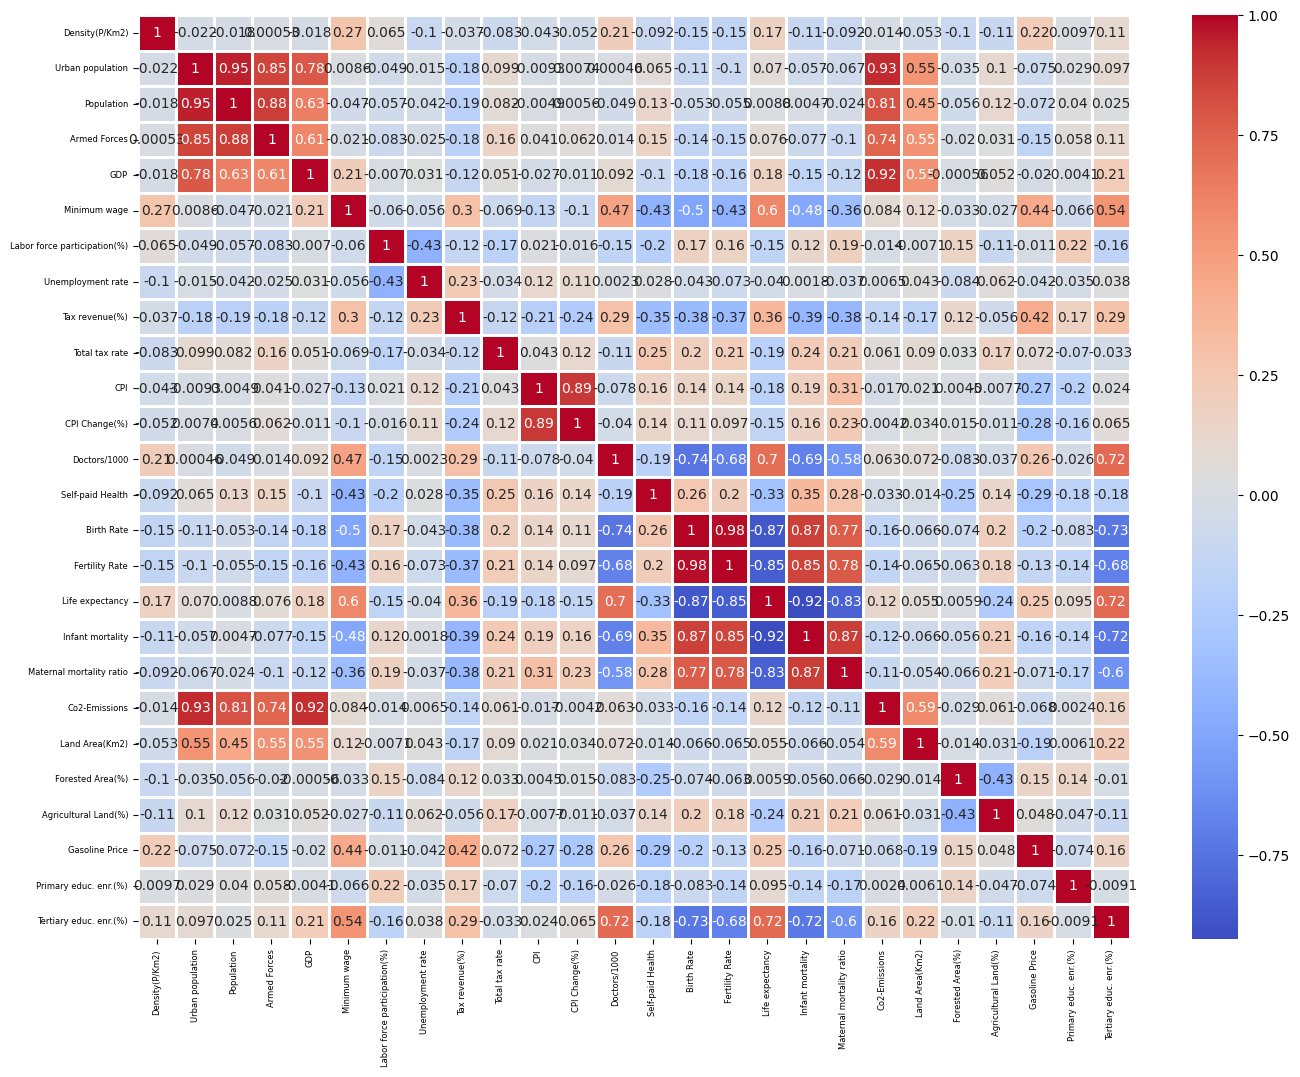

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(raw_data.drop(['Country'],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6)
plt.show()

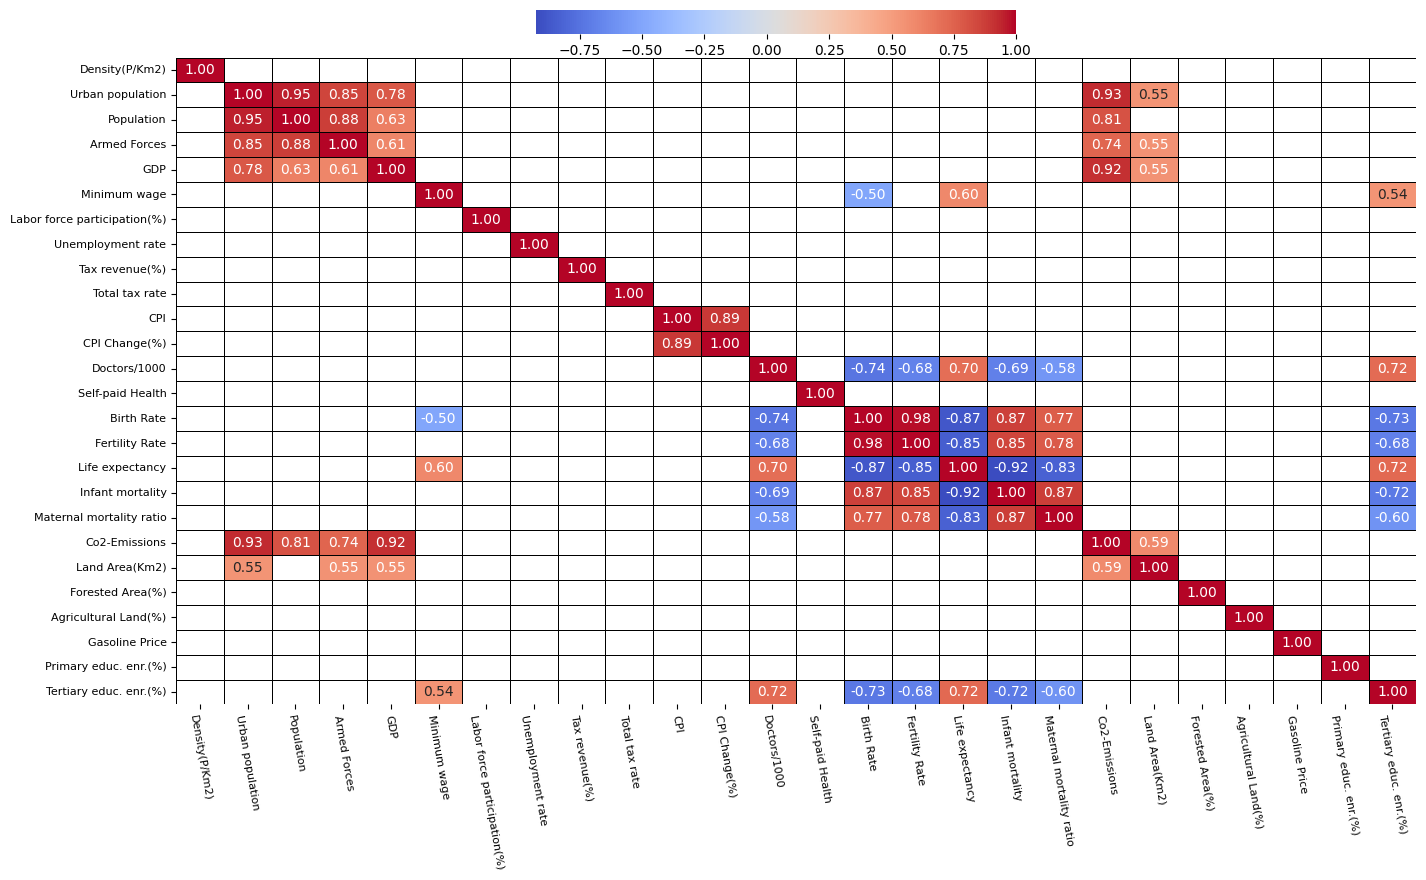

In [19]:
plt.figure(figsize=(16,12))
corr_matrix = raw_data.drop(['Country'],axis=1).corr()

mask = np.abs(corr_matrix) < 0.5 

ax = sns.heatmap(corr_matrix,cmap='coolwarm',linecolor='black',linewidths=0.5,annot=True,fmt=".2f",mask=mask,
                 cbar_kws={"orientation":"horizontal"})  
cbar = ax.collections[0].colorbar
cbar.ax.set_position([0.3, 0.9, 0.4, 0.02])  

plt.xticks(fontsize=8, rotation=280)  
plt.yticks(fontsize=8)
plt.show()

In [20]:
dataset = raw_data.drop(['Infant mortality','Land Area(Km2)','Co2-Emissions','CPI Change(%)','Fertility Rate',
                         'Doctors/1000','Gasoline Price','Minimum wage','Tertiary educ. enr.(%)',
                         'Maternal mortality ratio','Life expectancy','Tax revenue(%)','Population','Urban population'],axis=1)

In [21]:
dataset.dropna(inplace=True)

In [22]:
dataset.head()

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
0,Afghanistan,60.0,323000.0,1.910135e+10,48.9,11.12,71.4,149.90,78.4,32.49,2.1,58.1,104.0
1,Albania,105.0,9000.0,1.527808e+10,55.7,12.33,36.6,119.05,56.9,11.78,28.1,43.1,107.0
2,Algeria,18.0,317000.0,1.699882e+11,41.2,11.70,66.1,151.36,28.1,24.28,0.8,17.4,109.9
4,Angola,26.0,117000.0,9.463542e+10,77.5,6.89,49.1,261.73,33.4,40.73,46.3,47.5,113.5
6,Argentina,17.0,105000.0,4.496634e+11,61.3,9.79,106.3,232.75,17.6,17.02,9.8,54.3,109.7


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       160 non-null    object 
 1   Density(P/Km2)                160 non-null    float64
 2   Armed Forces                  160 non-null    float64
 3   GDP                           160 non-null    float64
 4   Labor force participation(%)  160 non-null    float64
 5   Unemployment rate             160 non-null    float64
 6   Total tax rate                160 non-null    float64
 7   CPI                           160 non-null    float64
 8   Self-paid Health              160 non-null    float64
 9   Birth Rate                    160 non-null    float64
 10  Forested Area(%)              160 non-null    float64
 11  Agricultural Land(%)          160 non-null    float64
 12  Primary educ. enr.(%)         160 non-null    float64
dtypes: float64

In [24]:
dataset.describe().round(2)

,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
count,160.00,160.00,1.600000e+02,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00,160.00
mean,212.76,156300.00,5.733593e+11,62.73,6.80,39.82,171.26,33.47,20.37,30.47,39.46,103.11
std,707.71,378584.48,2.375542e+12,10.27,4.92,15.35,232.11,18.45,9.99,23.05,21.74,11.83
min,2.00,0.00,4.290166e+08,38.00,0.09,8.00,99.03,5.30,6.40,0.00,0.60,61.80
25%,31.75,10750.00,1.433814e+10,56.42,3.40,30.60,115.14,18.20,11.23,10.48,22.88,98.95
50%,83.00,29500.00,5.355460e+10,62.15,5.38,37.55,129.09,32.10,18.12,31.15,40.00,102.35
75%,152.25,136500.00,3.034813e+11,68.95,9.21,47.50,162.54,43.98,28.83,47.18,55.02,107.52
max,8358.00,3031000.00,2.142770e+13,86.80,28.18,106.30,2740.27,81.60,46.08,98.30,82.60,142.50


## correlation studies

In [25]:
dataset.drop(['Country',],axis=1).corr()

,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
Density(P/Km2),1.000000,-0.001345,-0.009631,0.075132,-0.114883,-0.154226,-0.044617,0.019683,-0.150781,-0.119880,-0.115295,-0.000836
Armed Forces,-0.001345,1.000000,0.632299,-0.136101,-0.003975,0.158017,0.062207,0.156528,-0.144134,-0.028846,0.052401,0.037946
GDP,-0.009631,0.632299,1.000000,-0.007185,0.038622,0.089542,-0.029153,-0.124016,-0.200245,0.015731,0.052171,-0.017783
Labor force participation(%),0.075132,-0.136101,-0.007185,1.000000,-0.469287,-0.153379,-0.077920,-0.216806,0.187142,0.149177,-0.083346,0.253734
Unemployment rate,-0.114883,-0.003975,0.038622,-0.469287,1.000000,0.008996,0.113326,0.015011,-0.020339,-0.119476,0.093534,0.001884
Total tax rate,-0.154226,0.158017,0.089542,-0.153379,0.008996,1.000000,0.196402,0.189269,0.212422,0.052578,0.093232,-0.012215
CPI,-0.044617,0.062207,-0.029153,-0.077920,0.113326,0.196402,1.000000,0.123986,0.089296,0.020567,-0.021295,-0.055368
Self-paid Health,0.019683,0.156528,-0.124016,-0.216806,0.015011,0.189269,0.123986,1.000000,0.287166,-0.192119,0.075625,-0.162439
Birth Rate,-0.150781,-0.144134,-0.200245,0.187142,-0.020339,0.212422,0.089296,0.287166,1.000000,-0.060518,0.169065,0.053573
Forested Area(%),-0.119880,-0.028846,0.015731,0.149177,-0.119476,0.052578,0.020567,-0.192119,-0.060518,1.000000,-0.412526,0.126639


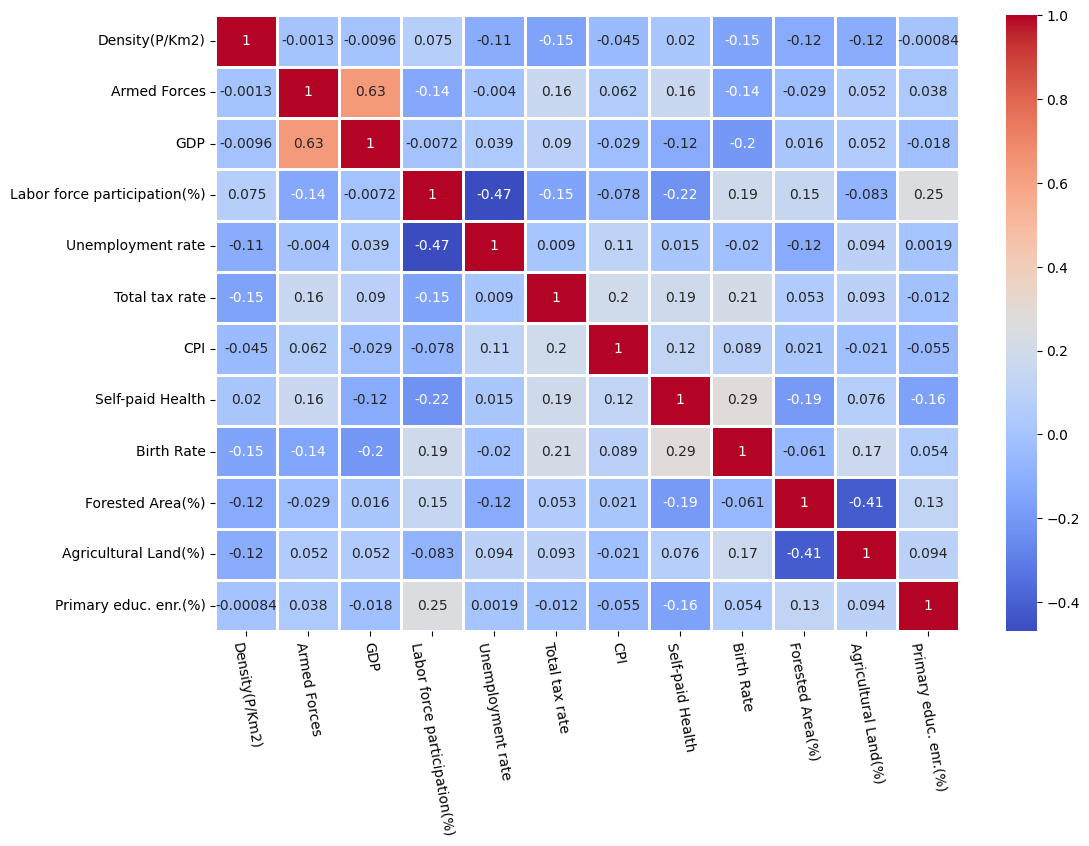

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.drop(['Country',],axis=1).corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)
plt.xticks(rotation=280)  
plt.show()

# EDA

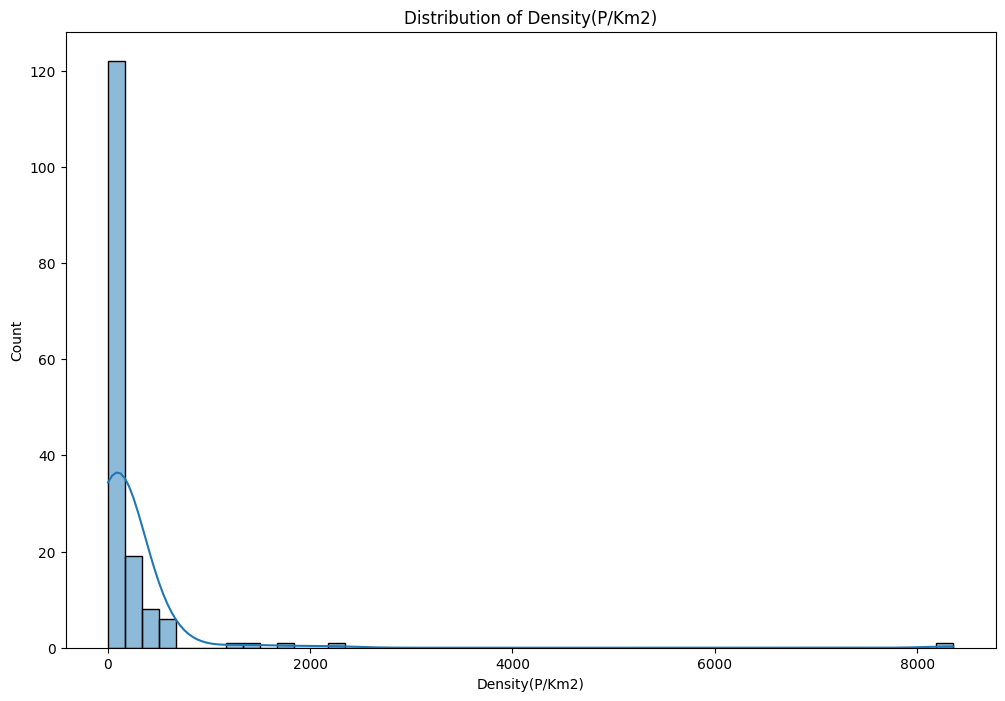

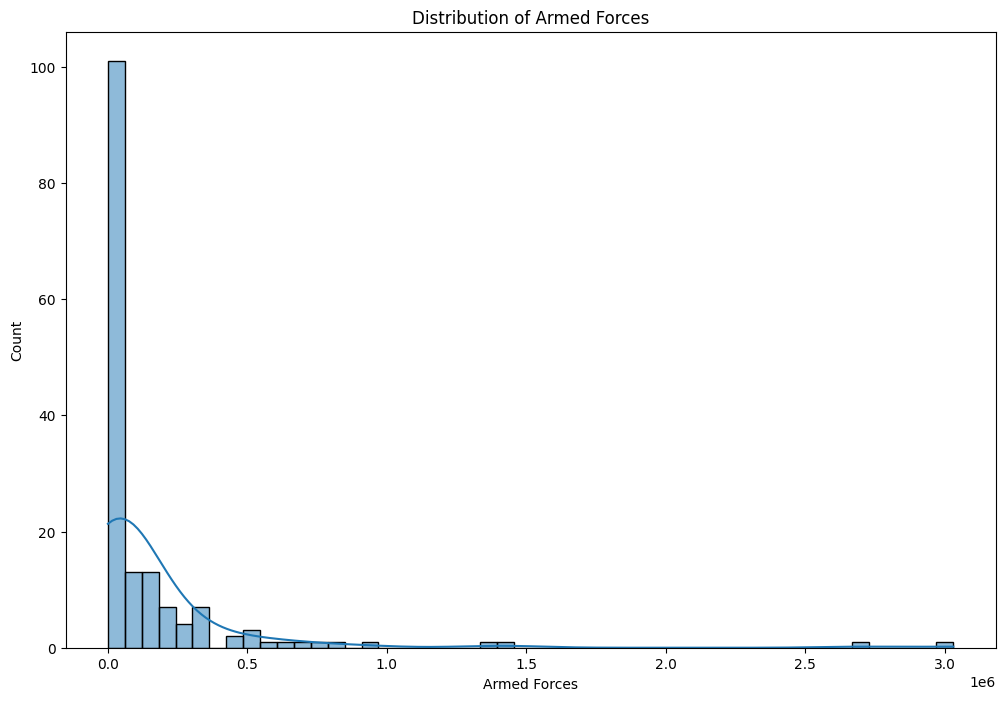

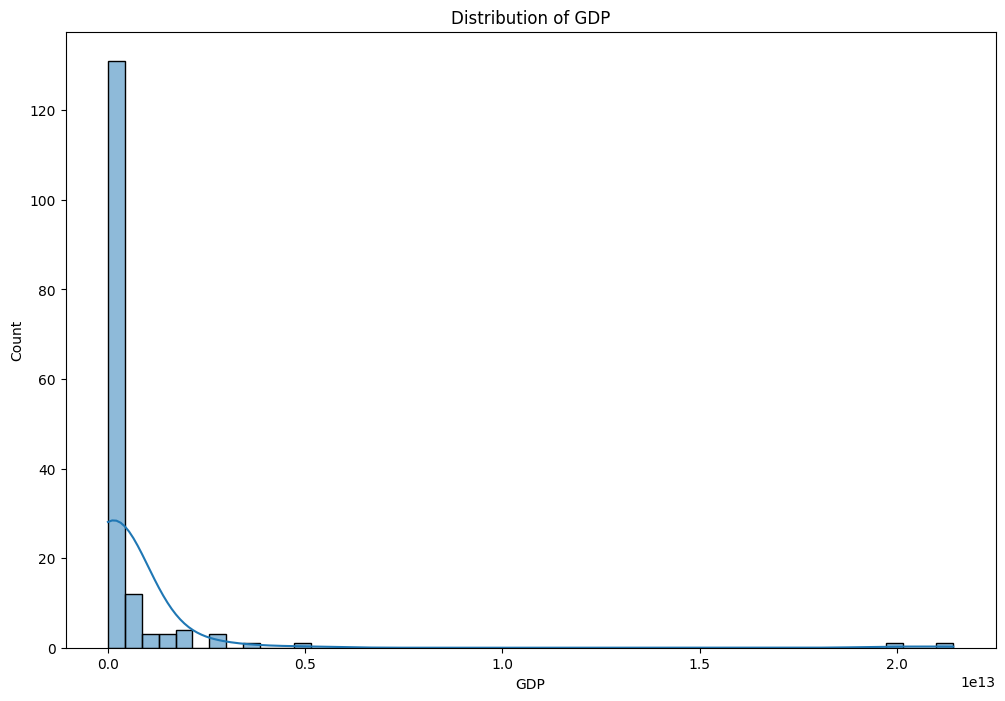

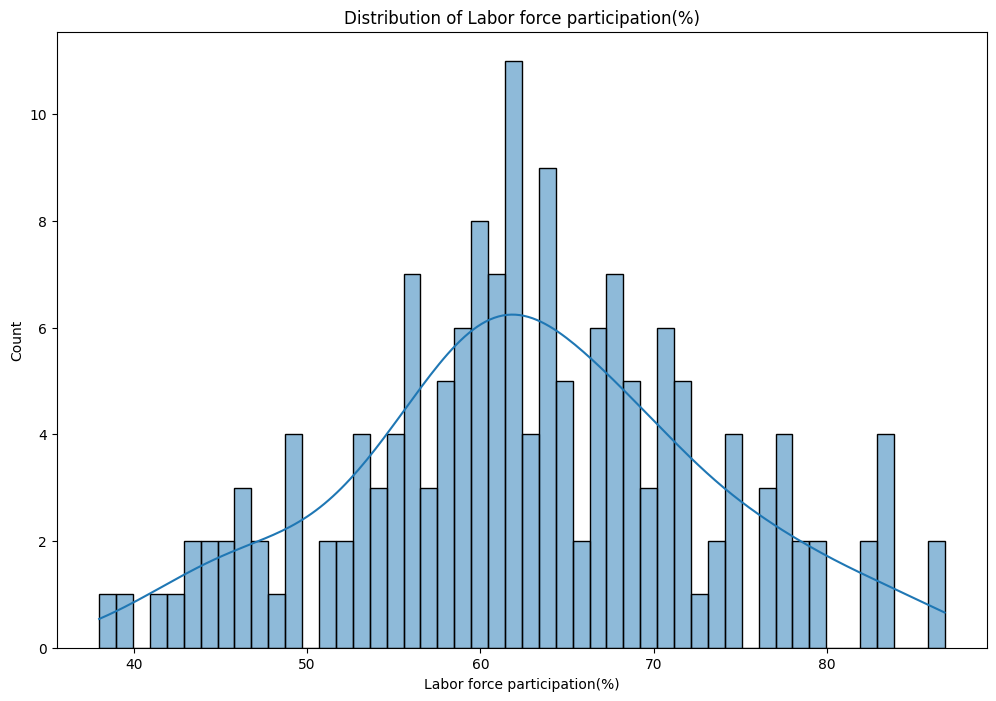

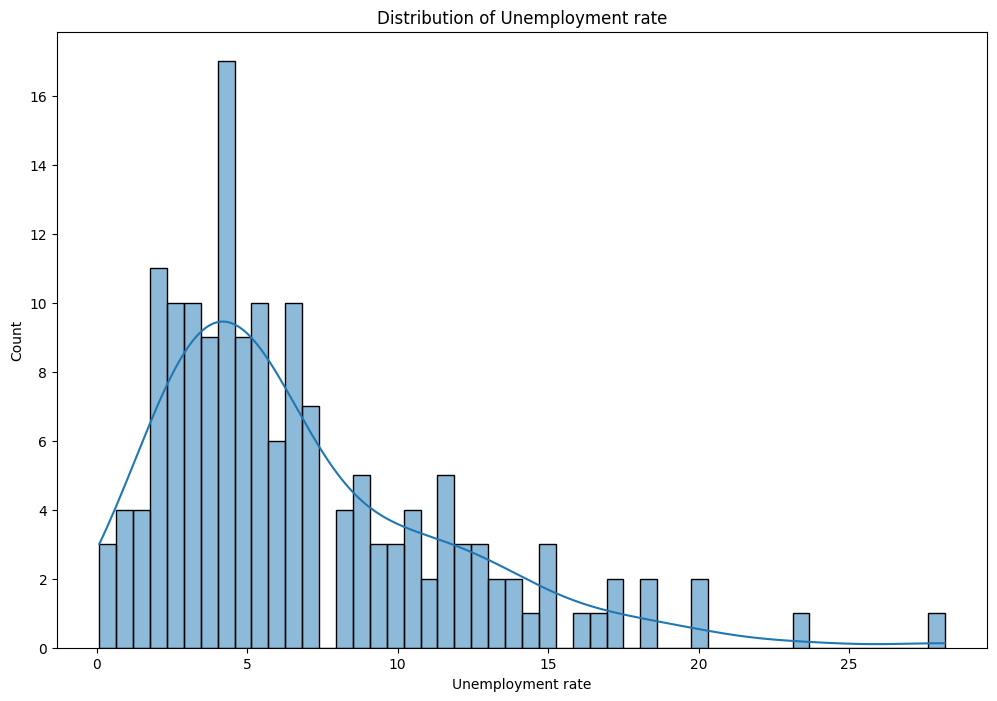

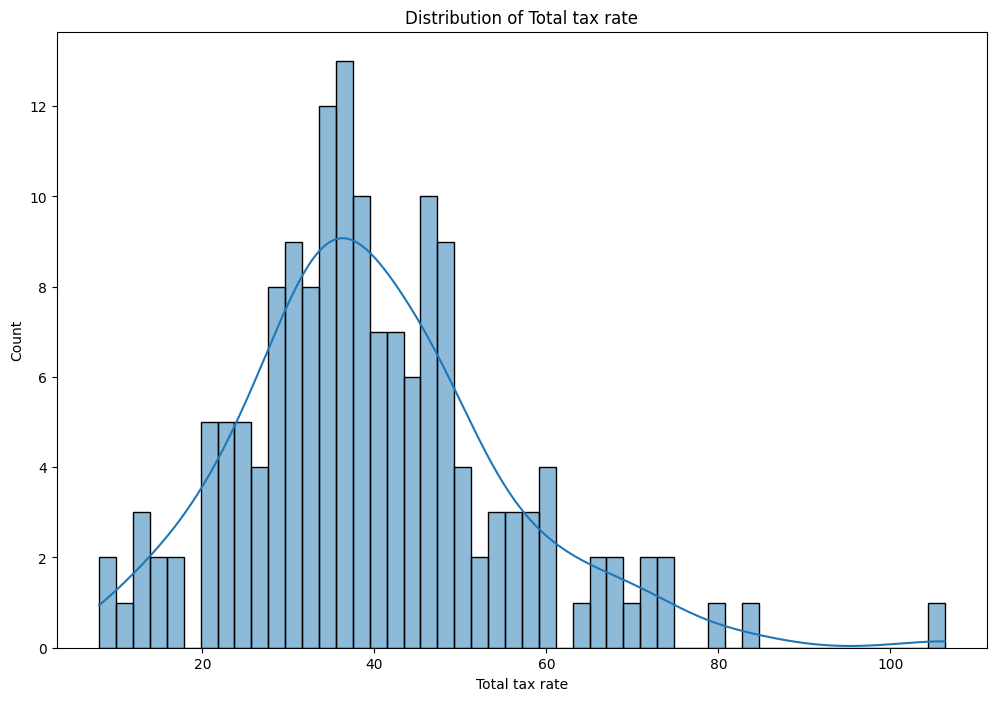

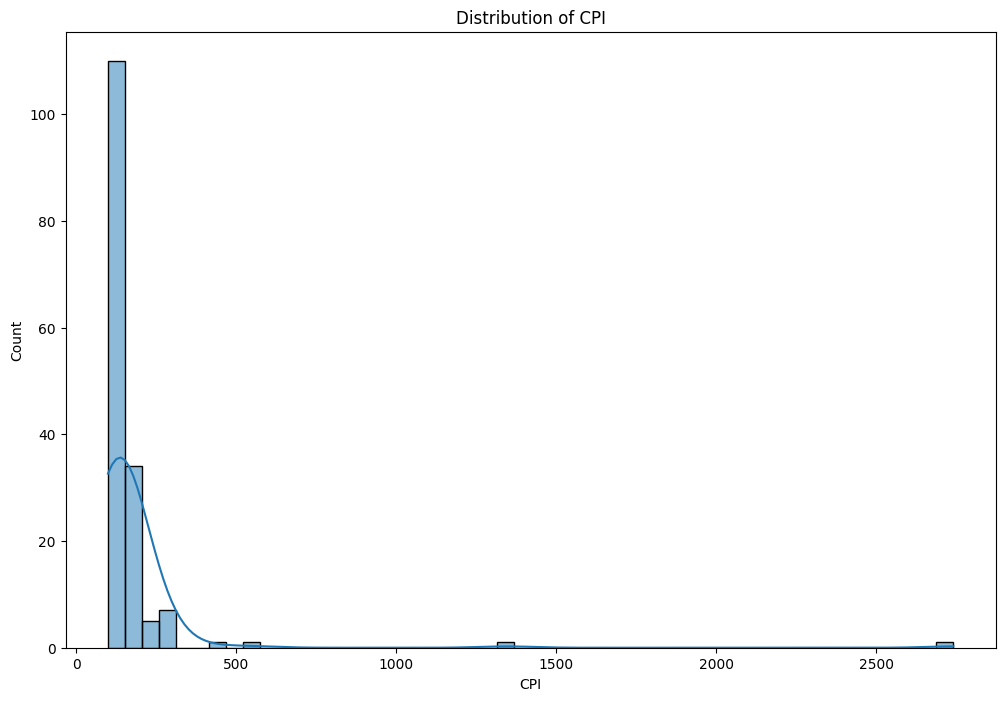

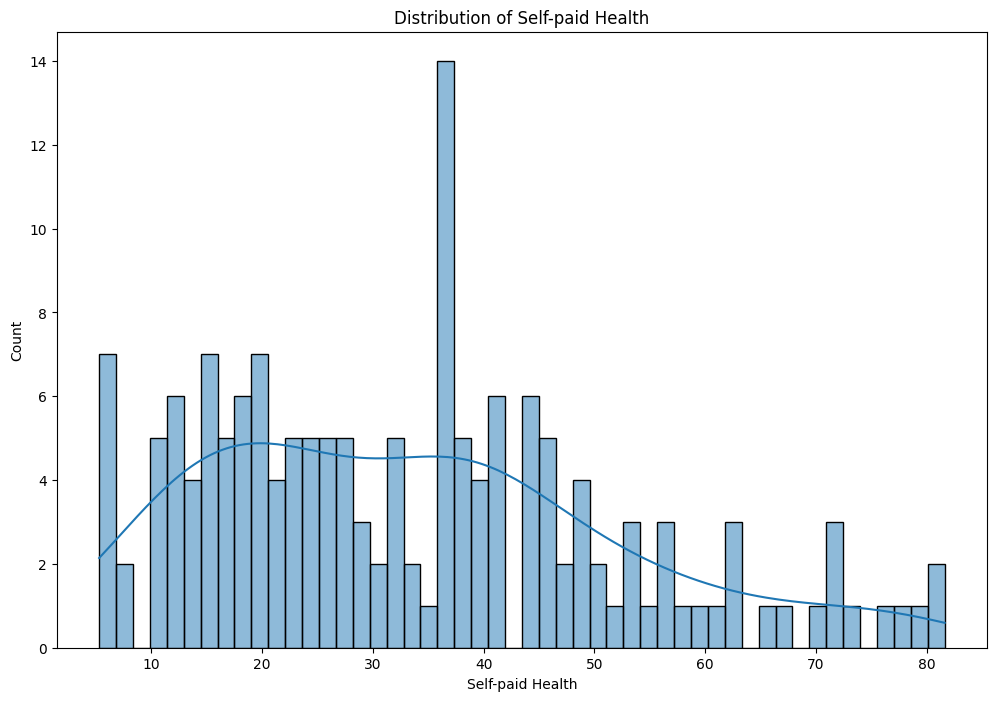

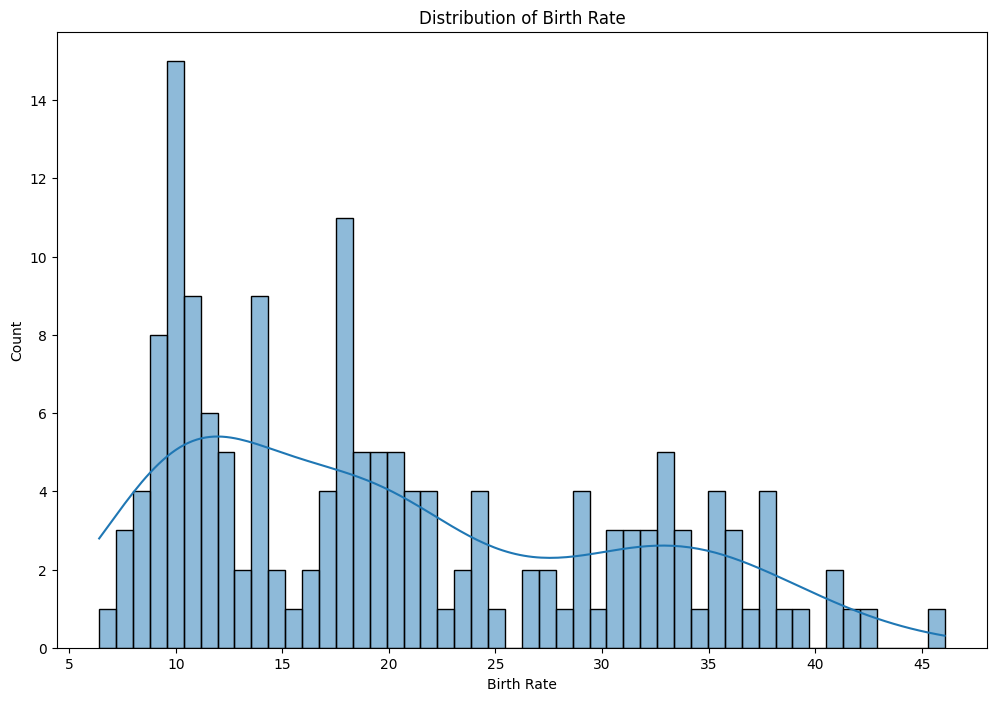

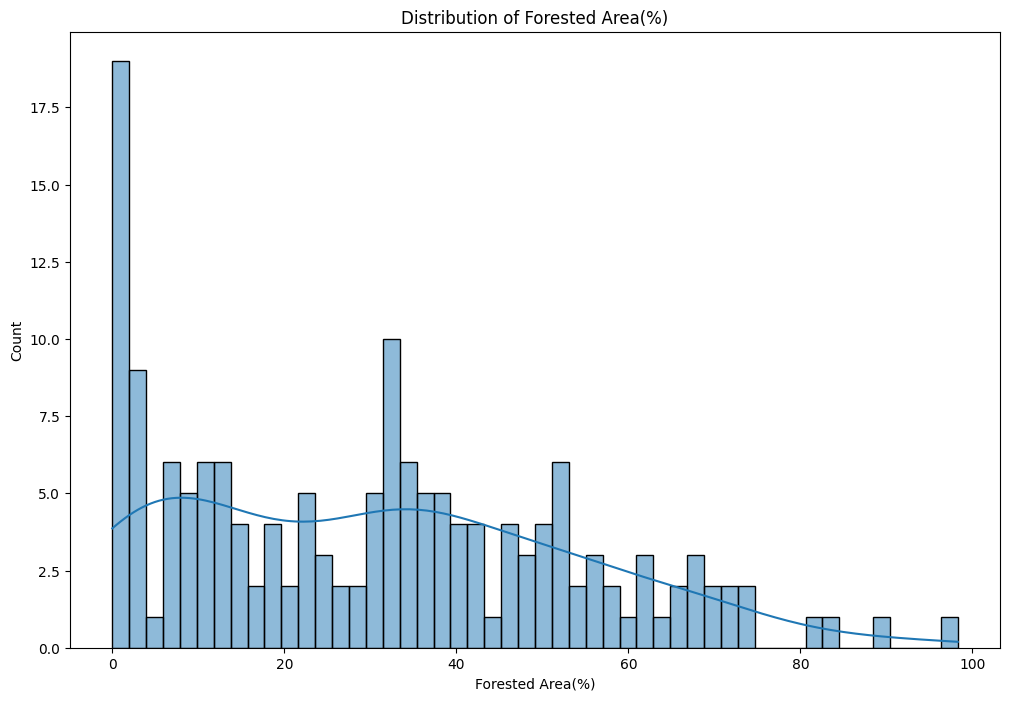

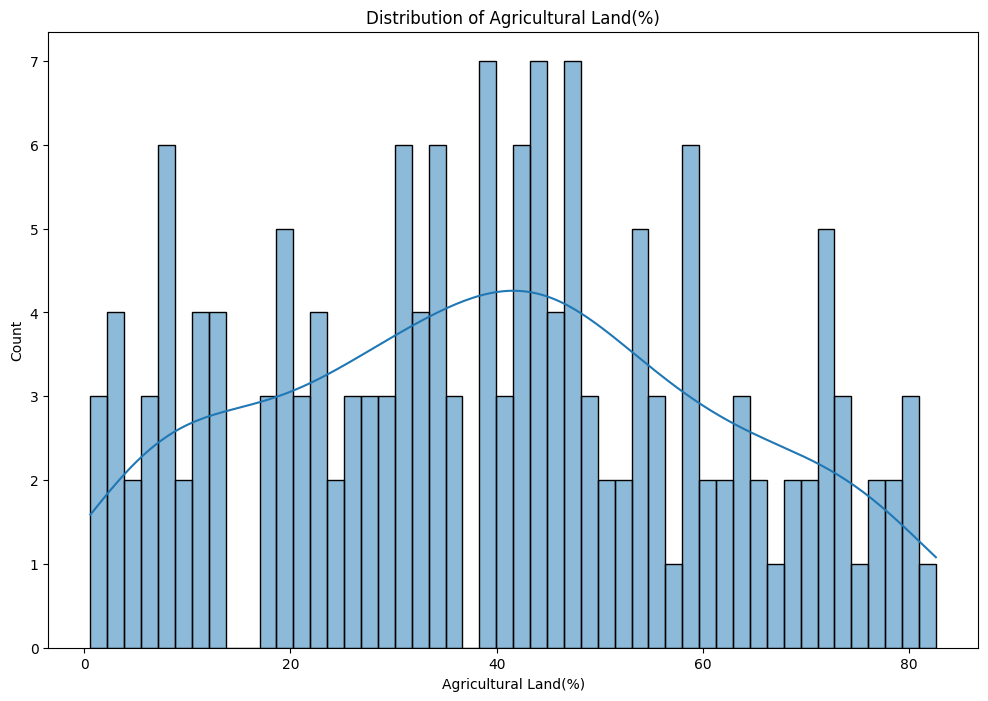

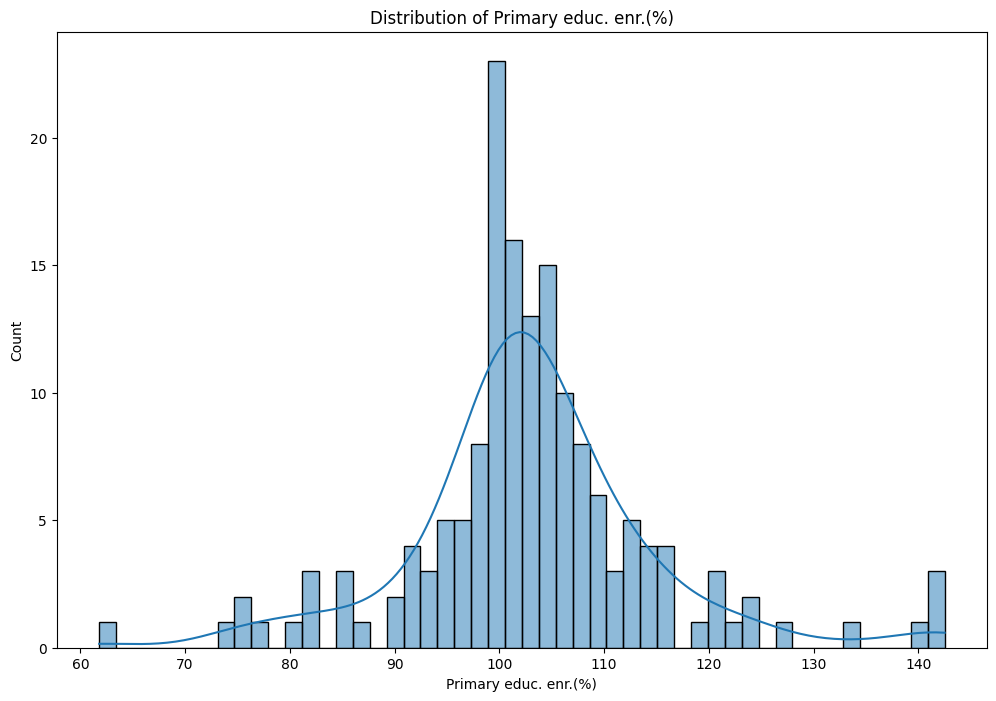

In [27]:
for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()

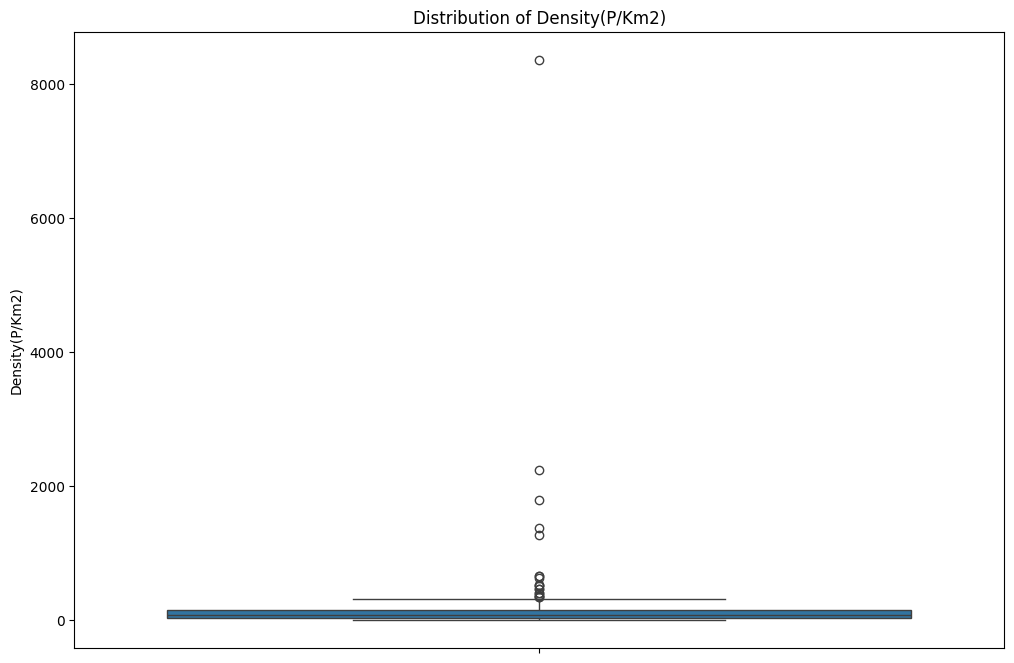

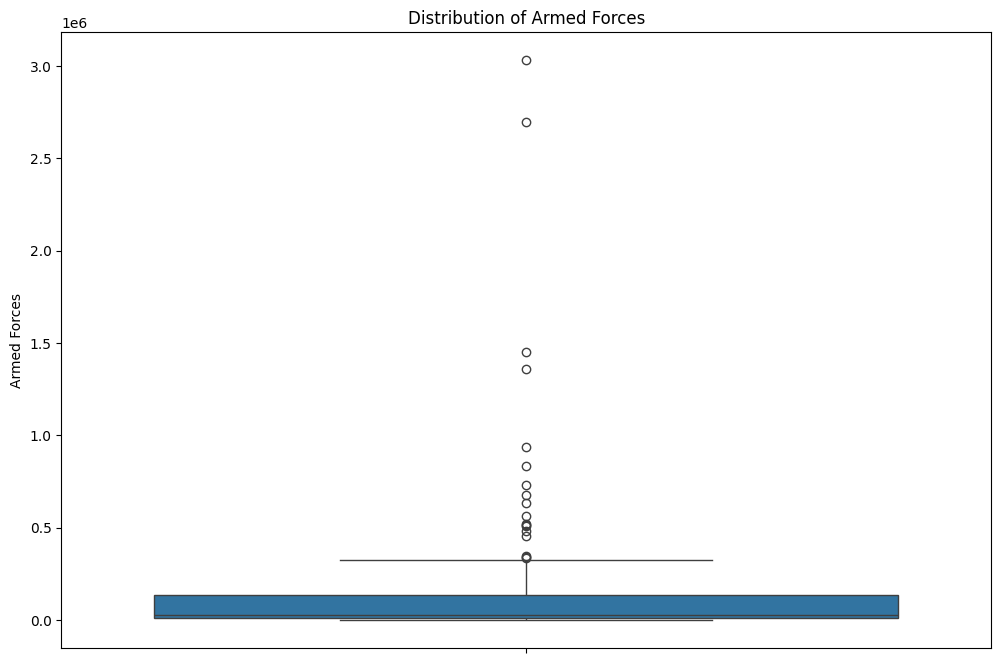

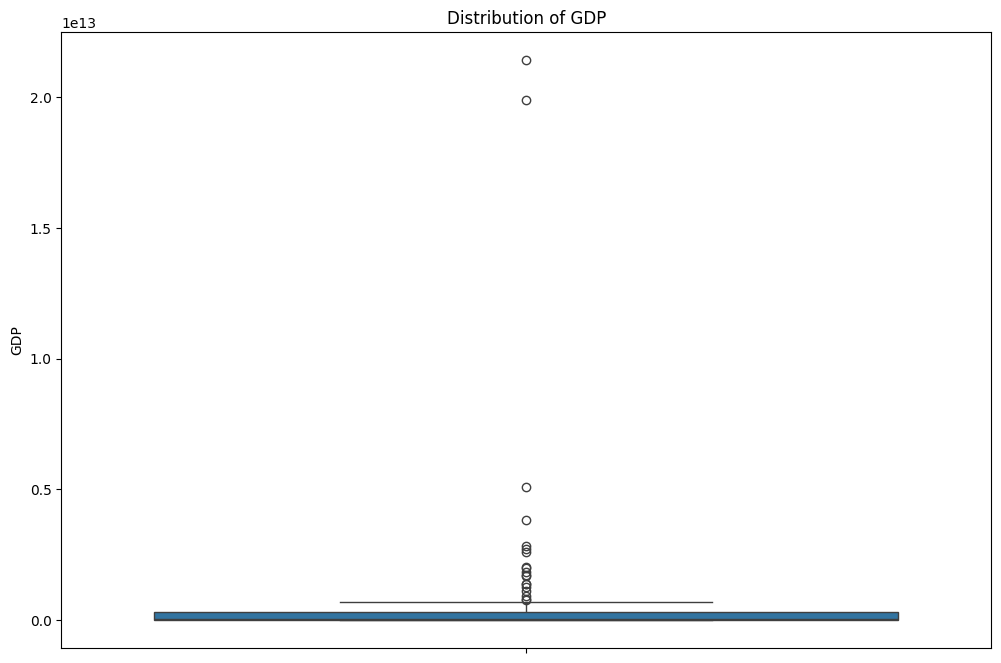

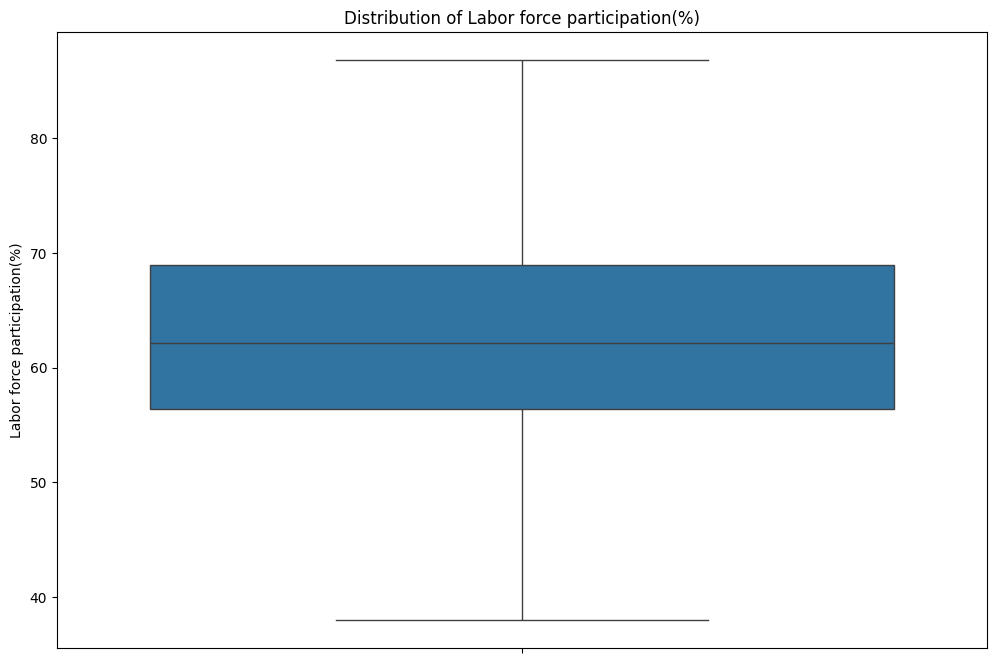

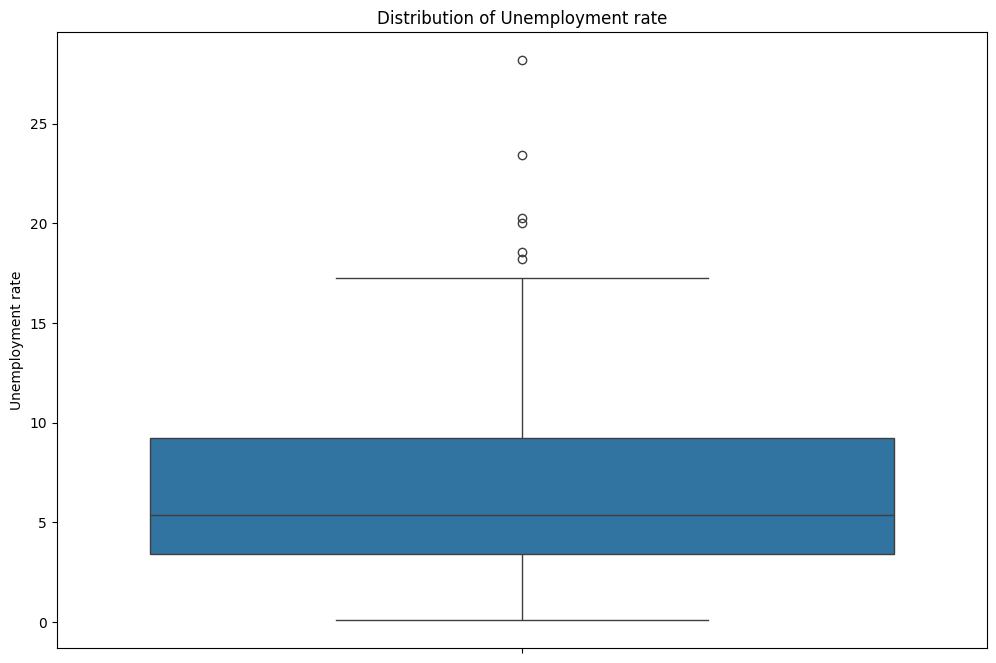

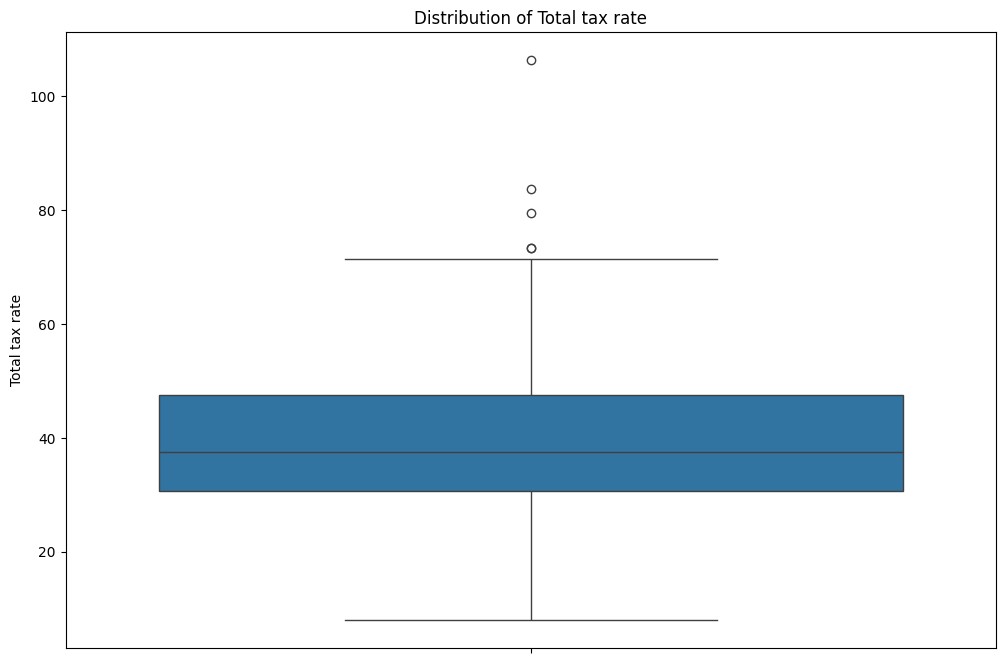

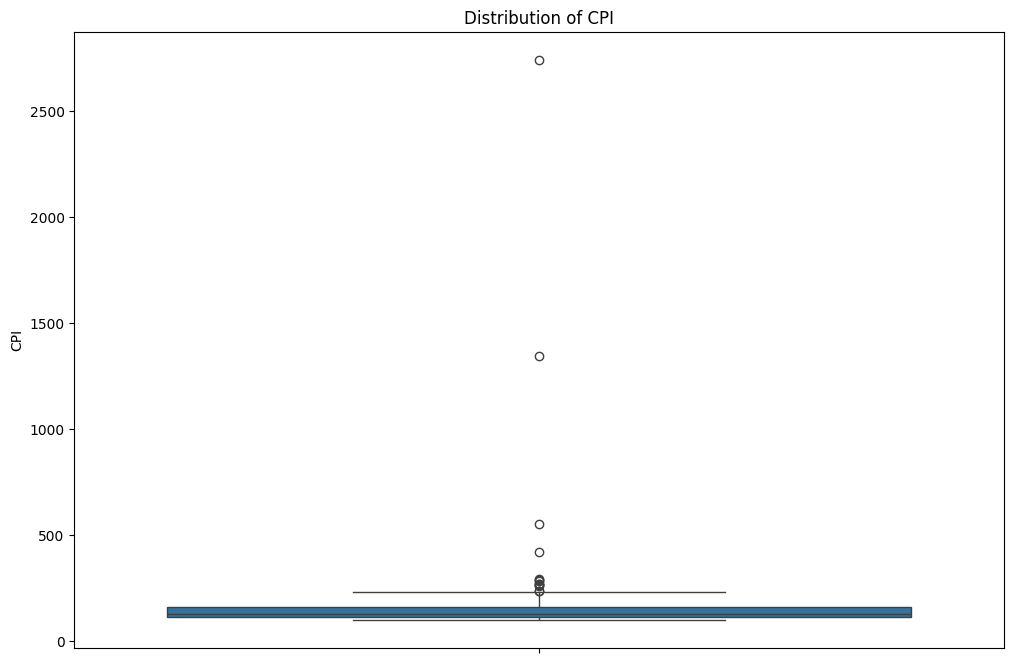

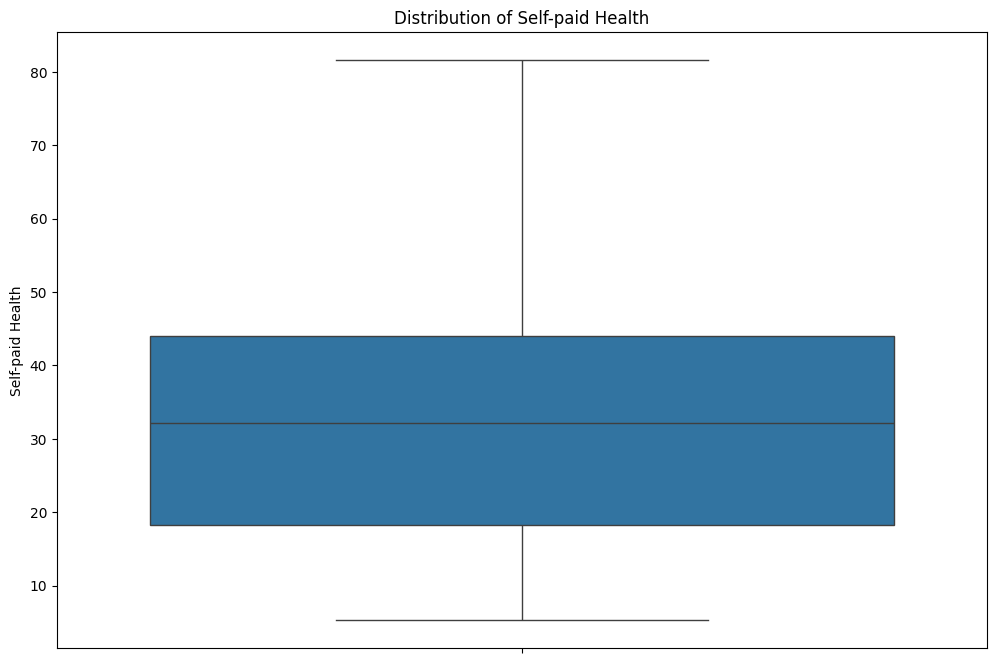

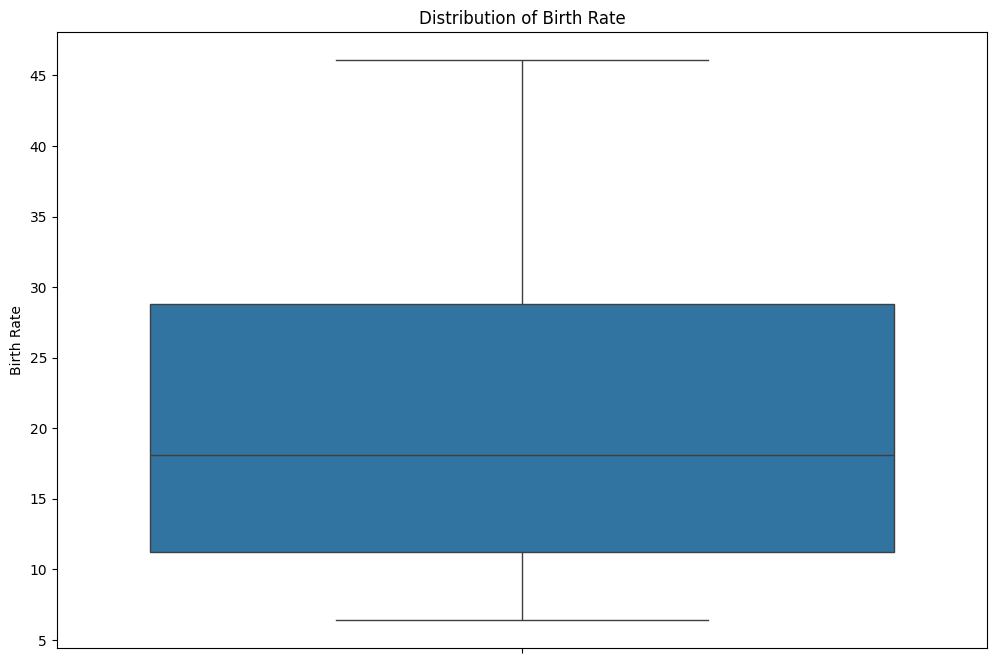

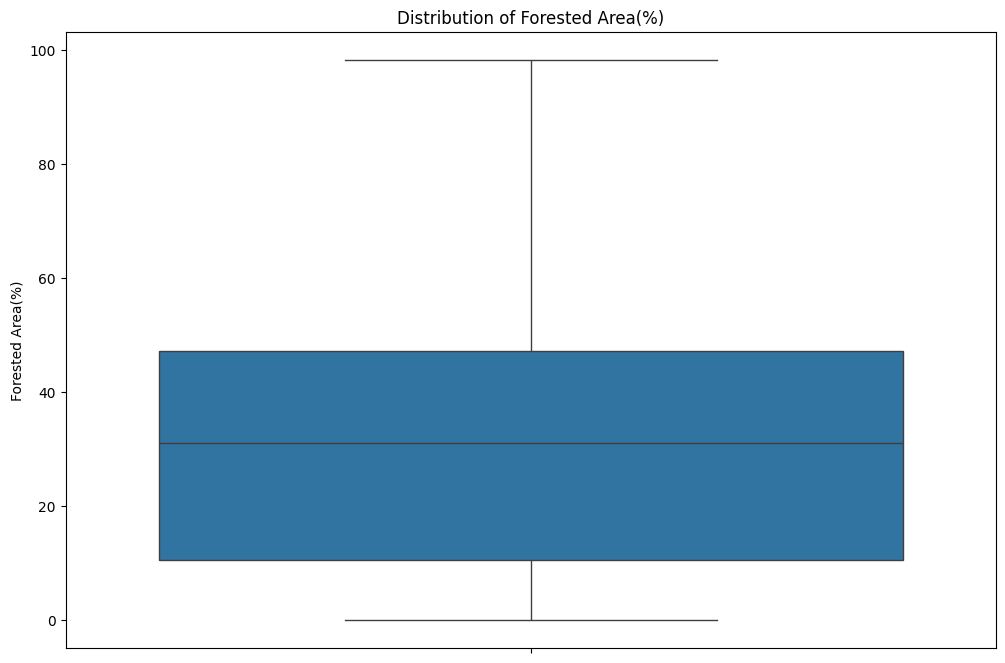

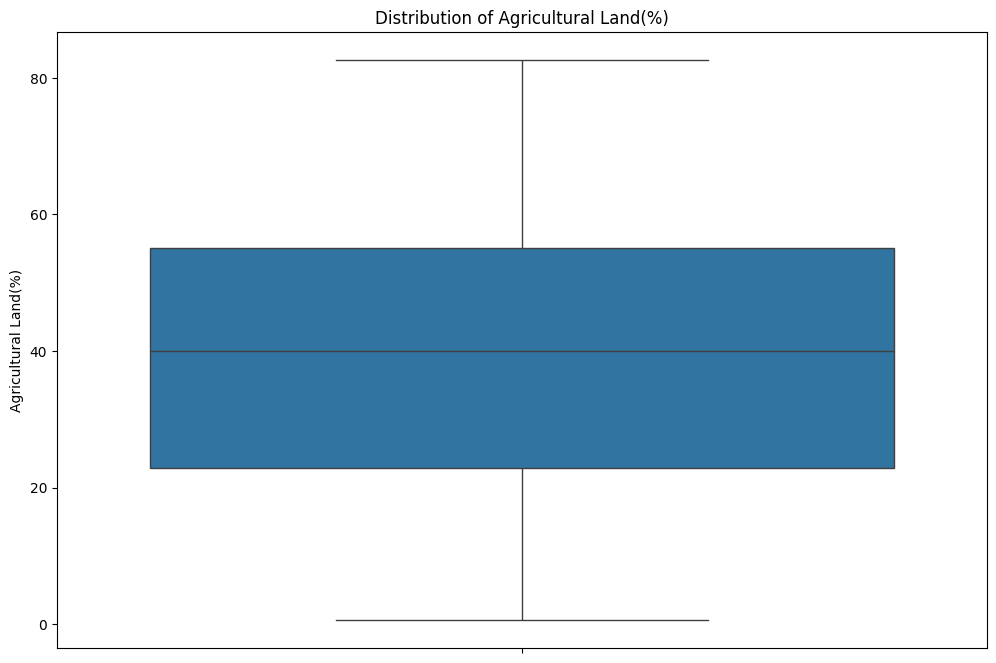

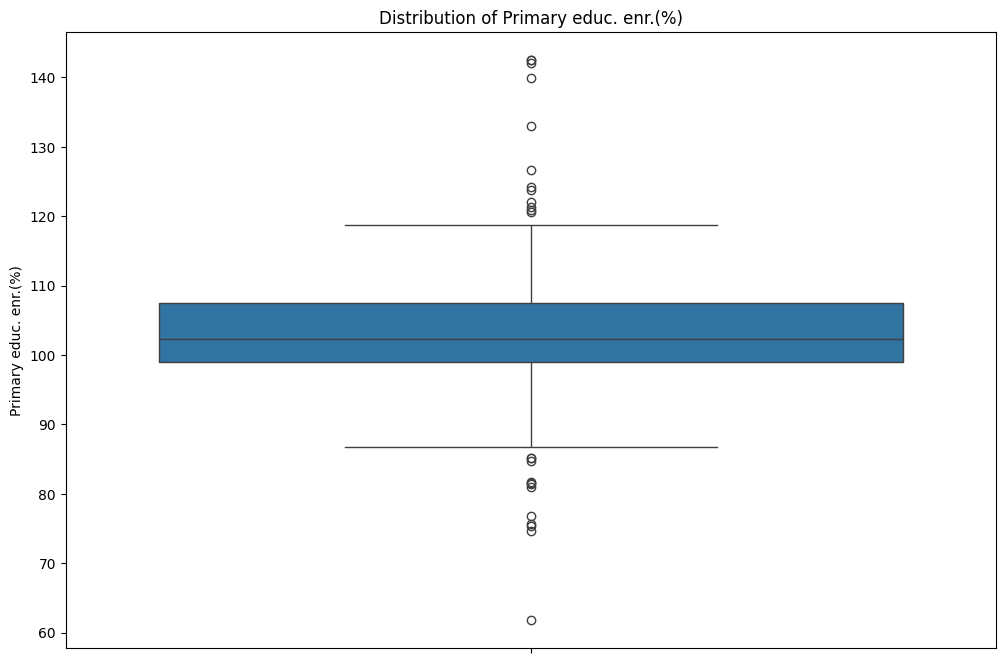

In [28]:
for i in dataset.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(dataset[i])
    plt.title(f'Distribution of {i}')
    plt.show()

## outliers detection

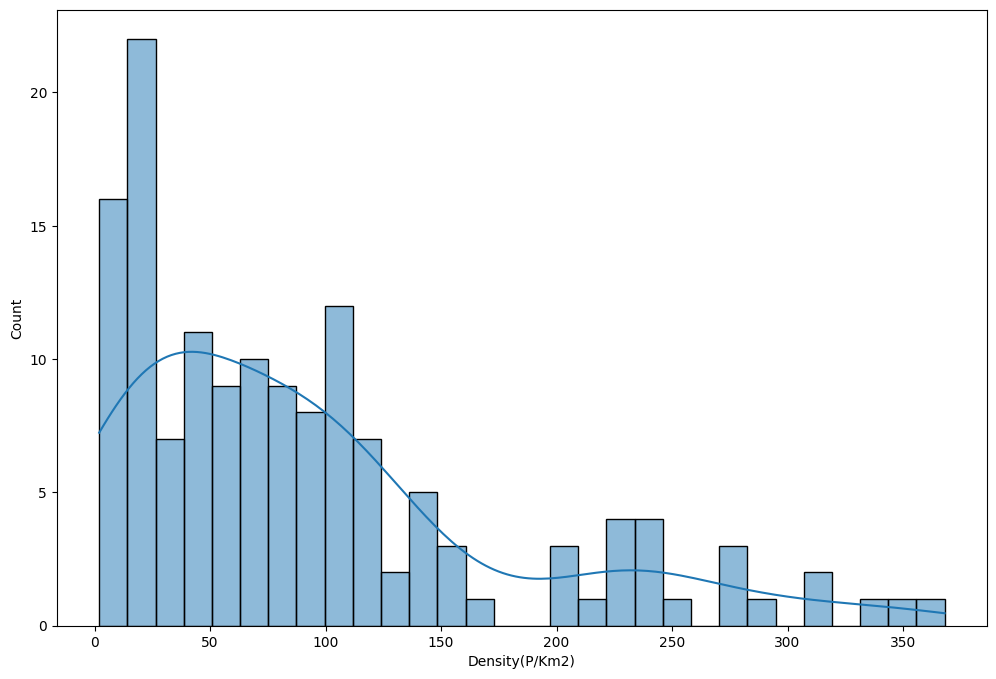

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['Density(P/Km2)'] < dataset['Density(P/Km2)'].quantile(0.90)]['Density(P/Km2)'],
             kde=True,bins=30)
plt.show()

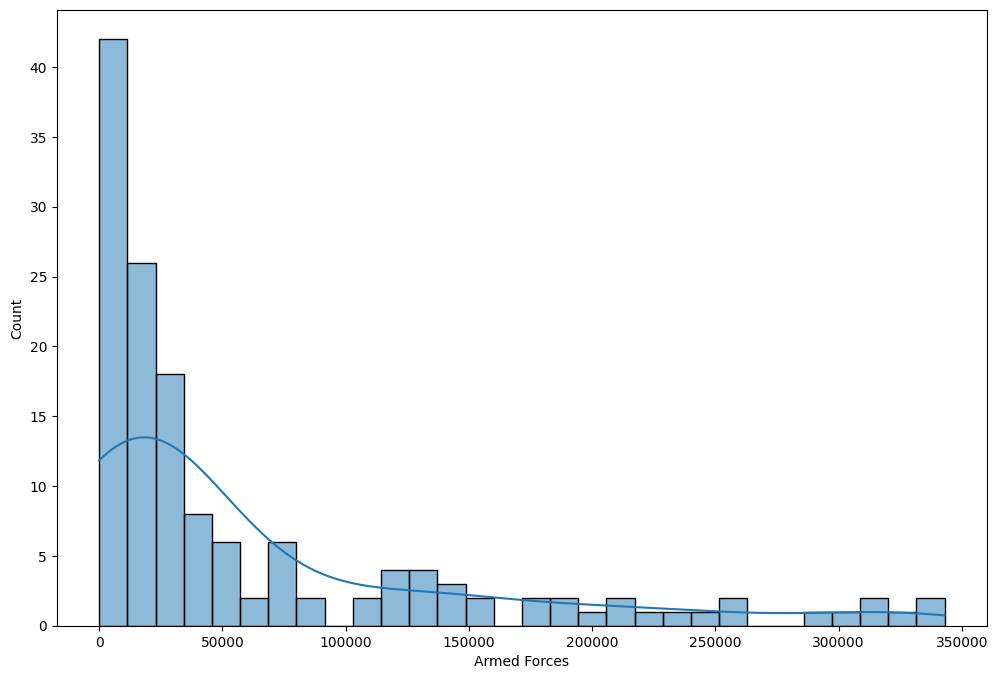

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['Armed Forces'] < dataset['Armed Forces'].quantile(0.90)]['Armed Forces'],
             kde=True,bins=30)
plt.show()

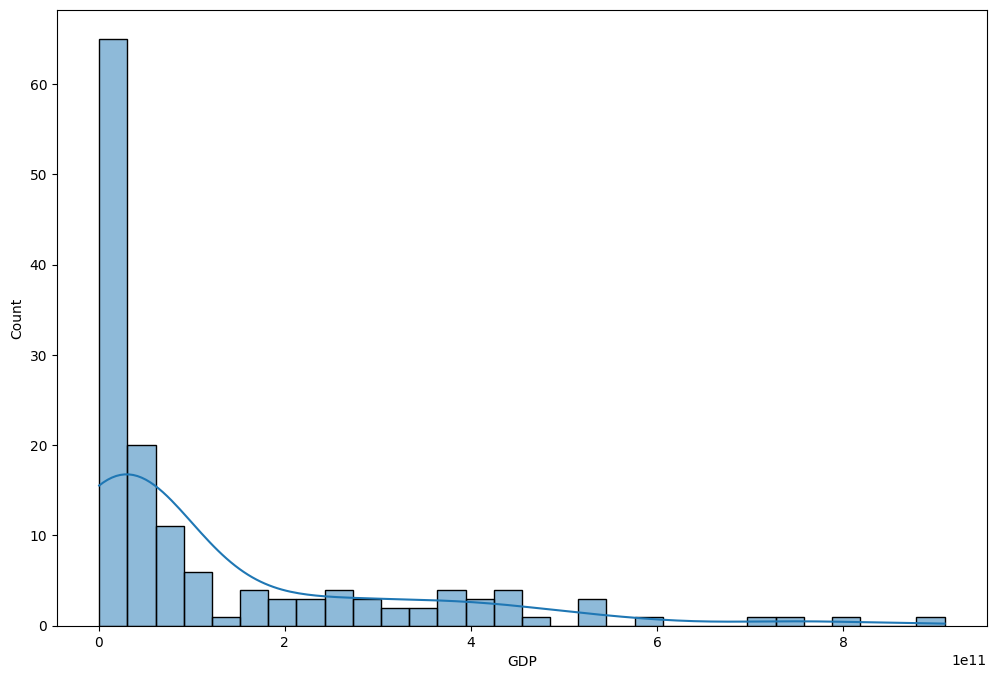

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['GDP'] < dataset['GDP'].quantile(0.90)]['GDP'],
             kde=True,bins=30)
plt.show()

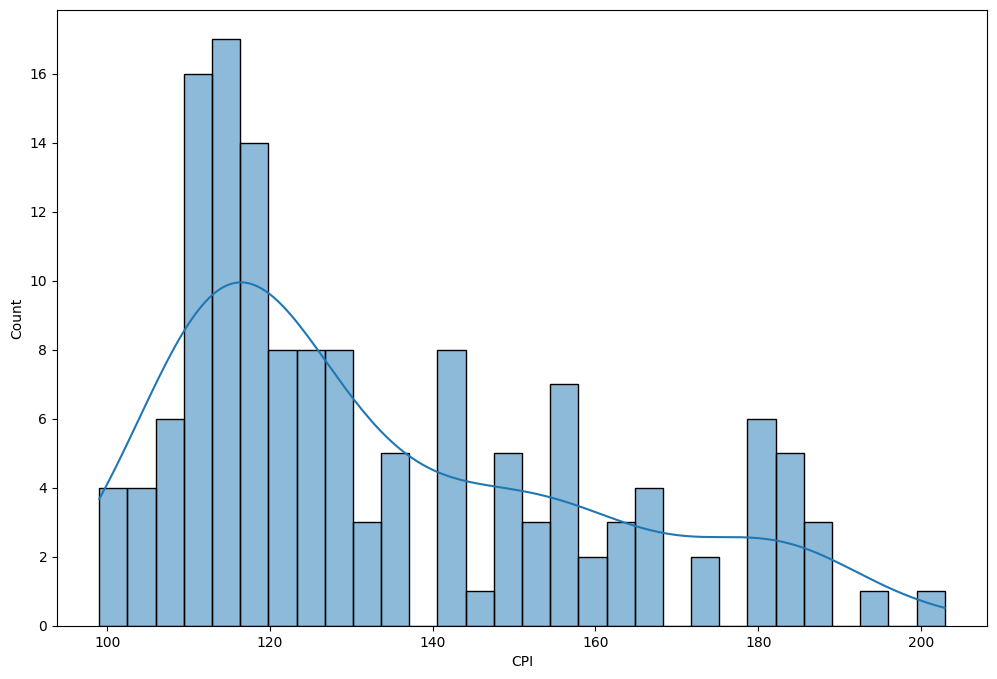

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['CPI'] < dataset['CPI'].quantile(0.90)]['CPI'],
             kde=True,bins=30)
plt.show()

In [68]:
z_scores = np.abs(stats.zscore(dataset['Density(P/Km2)']))
outliers = dataset[z_scores > 3]  
outliers

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
156,Singapore,8358.0,81000.0,3.720625e+11,70.5,4.11,21.0,114.41,36.7,8.8,23.1,0.9,100.6


In [71]:
z_scores = np.abs(stats.zscore(dataset['Armed Forces']))
outliers = dataset[z_scores > 3]  
outliers

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
36,China,153.0,2695000.0,1.991000e+13,68.0,4.32,59.2,125.08,32.4,10.90,22.4,56.2,100.2
77,India,464.0,3031000.0,2.611000e+12,49.3,5.36,49.7,180.44,65.1,17.86,23.8,60.4,113.0
143,Russia,9.0,1454000.0,1.699877e+12,61.8,4.59,46.2,180.75,36.4,11.50,49.8,13.3,102.6
186,United States,36.0,1359000.0,2.142770e+13,62.0,14.70,36.6,117.24,11.1,11.60,33.9,44.4,101.8


In [73]:
z_scores = np.abs(stats.zscore(dataset['GDP']))
outliers = dataset[z_scores > 3]  
outliers

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
36,China,153.0,2695000.0,1.991000e+13,68.0,4.32,59.2,125.08,32.4,10.9,22.4,56.2,100.2
186,United States,36.0,1359000.0,2.142770e+13,62.0,14.70,36.6,117.24,11.1,11.6,33.9,44.4,101.8


In [74]:
z_scores = np.abs(stats.zscore(dataset['CPI']))
outliers = dataset[z_scores > 3]  
outliers

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
166,Sudan,25.0,124000.0,1.890228e+10,48.4,16.53,45.4,1344.19,63.2,32.18,8.1,28.7,76.8
190,Venezuela,32.0,343000.0,4.823593e+11,59.7,8.80,73.3,2740.27,45.8,17.88,52.7,24.5,97.2


### outliers handling with RobustScaler

## data normalization

In [41]:
scaler = MinMaxScaler()

In [46]:
dataset_scaled = scaler.fit_transform(dataset.drop('Country',axis=1))

In [49]:
dataset_scaled = pd.DataFrame(dataset_scaled,columns=dataset.drop('Country',axis=1).columns)

In [50]:
dataset_scaled

,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
0,0.006941,0.106565,0.000871,0.223361,0.392666,0.644964,0.019260,0.958060,0.657510,0.021363,0.701220,0.522924
1,0.012326,0.002969,0.000693,0.362705,0.435742,0.290946,0.007580,0.676278,0.135585,0.285860,0.518293,0.560099
2,0.001915,0.104586,0.007913,0.065574,0.413314,0.591048,0.019813,0.298820,0.450605,0.008138,0.204878,0.596035
3,0.002872,0.038601,0.004397,0.809426,0.242079,0.418108,0.061600,0.368283,0.865171,0.471007,0.571951,0.640644
4,0.001795,0.034642,0.020966,0.477459,0.345319,1.000000,0.050628,0.161206,0.267641,0.099695,0.654878,0.593556
...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.003590,0.113164,0.022491,0.444672,0.310075,0.664293,1.000000,0.530799,0.289315,0.536114,0.291463,0.438662
156,0.037338,0.172220,0.012204,0.807377,0.068352,0.301119,0.024417,0.500655,0.260837,0.489318,0.471951,0.604709
157,0.006462,0.013197,0.001236,0.000000,0.456390,0.189217,0.022168,0.992136,0.606099,0.010173,0.536585,0.394052
158,0.002753,0.005279,0.001056,0.750000,0.403702,0.077314,0.042889,0.290957,0.750756,0.663276,0.384146,0.457249


In [51]:
dataset_scaled.insert(0,'Country',dataset['Country'].values)

In [53]:
dataset_scaled

,Country,Density(P/Km2),Armed Forces,GDP,Labor force participation(%),Unemployment rate,Total tax rate,CPI,Self-paid Health,Birth Rate,Forested Area(%),Agricultural Land(%),Primary educ. enr.(%)
0,Afghanistan,0.006941,0.106565,0.000871,0.223361,0.392666,0.644964,0.019260,0.958060,0.657510,0.021363,0.701220,0.522924
1,Albania,0.012326,0.002969,0.000693,0.362705,0.435742,0.290946,0.007580,0.676278,0.135585,0.285860,0.518293,0.560099
2,Algeria,0.001915,0.104586,0.007913,0.065574,0.413314,0.591048,0.019813,0.298820,0.450605,0.008138,0.204878,0.596035
3,Angola,0.002872,0.038601,0.004397,0.809426,0.242079,0.418108,0.061600,0.368283,0.865171,0.471007,0.571951,0.640644
4,Argentina,0.001795,0.034642,0.020966,0.477459,0.345319,1.000000,0.050628,0.161206,0.267641,0.099695,0.654878,0.593556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Venezuela,0.003590,0.113164,0.022491,0.444672,0.310075,0.664293,1.000000,0.530799,0.289315,0.536114,0.291463,0.438662
156,Vietnam,0.037338,0.172220,0.012204,0.807377,0.068352,0.301119,0.024417,0.500655,0.260837,0.489318,0.471951,0.604709
157,Yemen,0.006462,0.013197,0.001236,0.000000,0.456390,0.189217,0.022168,0.992136,0.606099,0.010173,0.536585,0.394052
158,Zambia,0.002753,0.005279,0.001056,0.750000,0.403702,0.077314,0.042889,0.290957,0.750756,0.663276,0.384146,0.457249


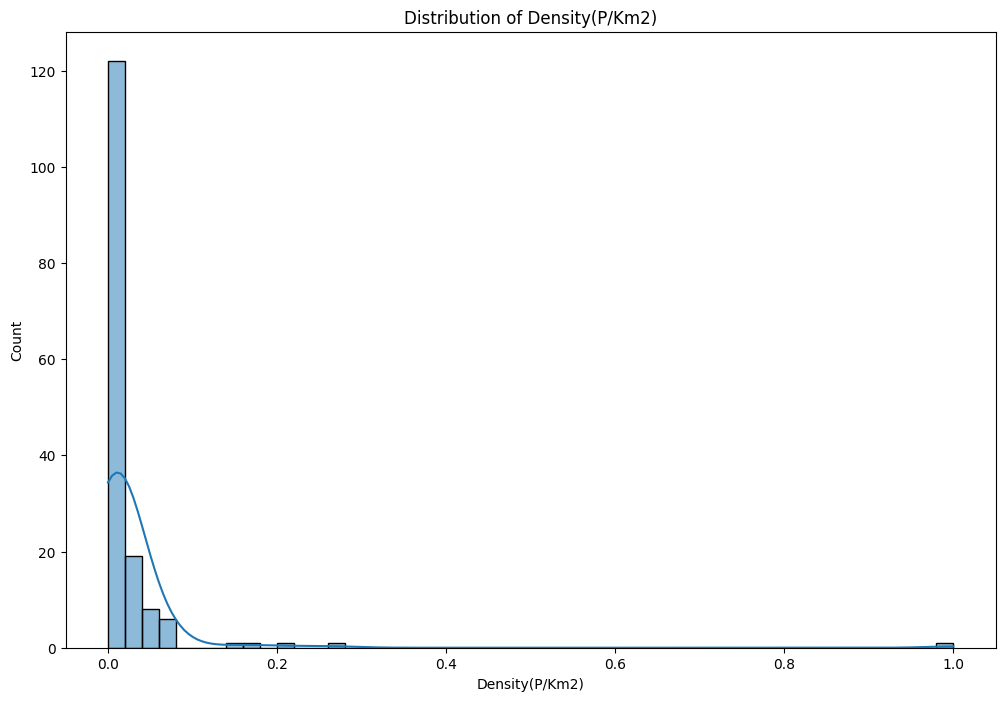

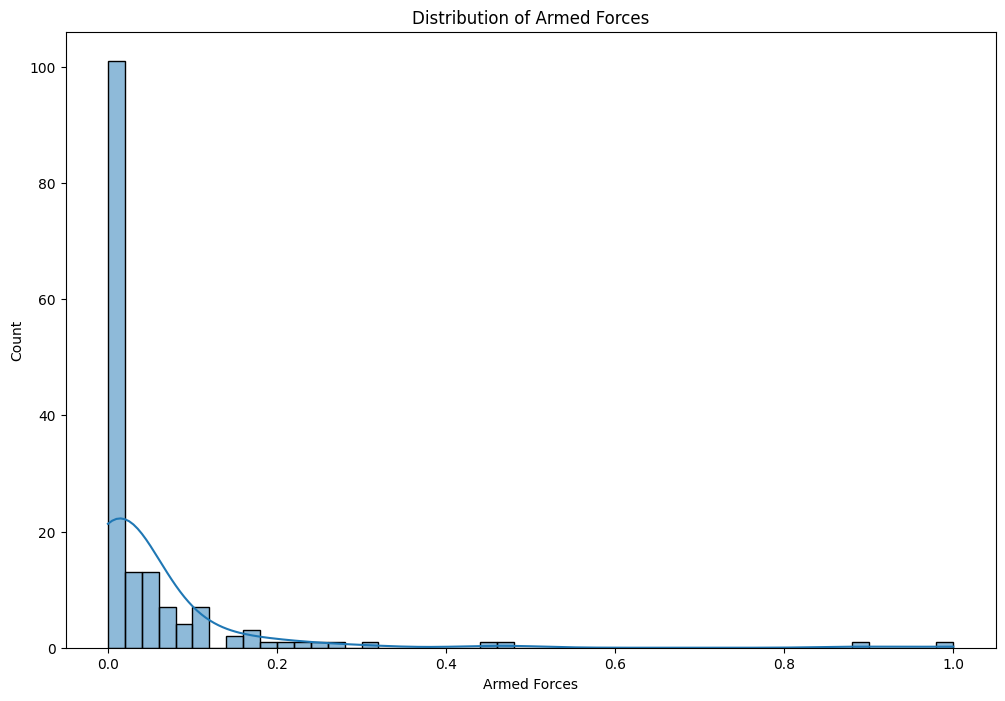

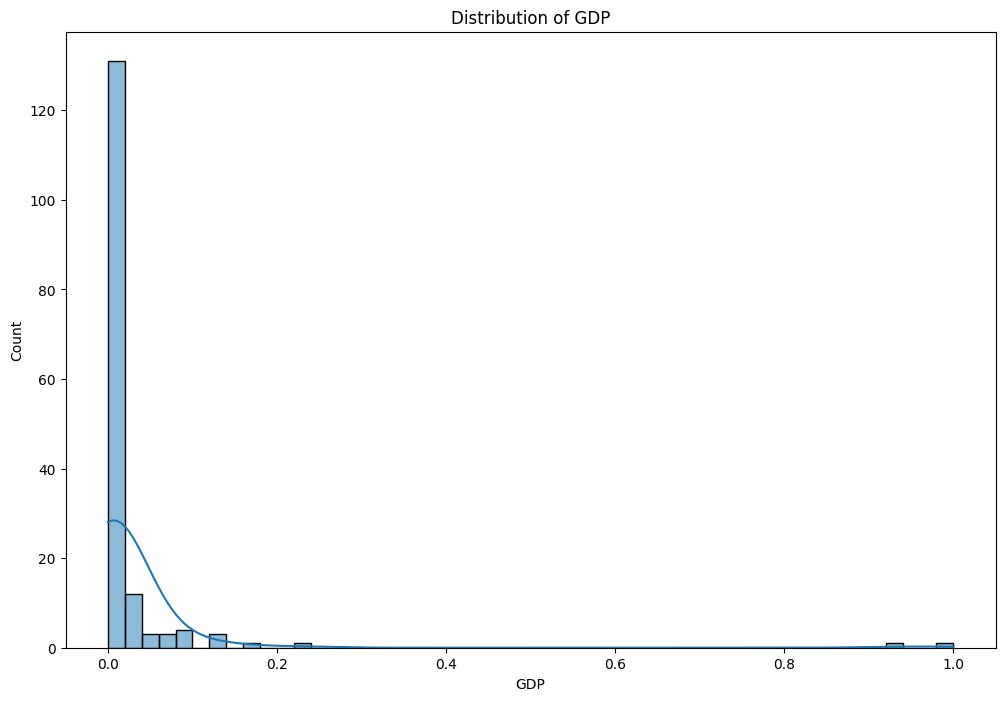

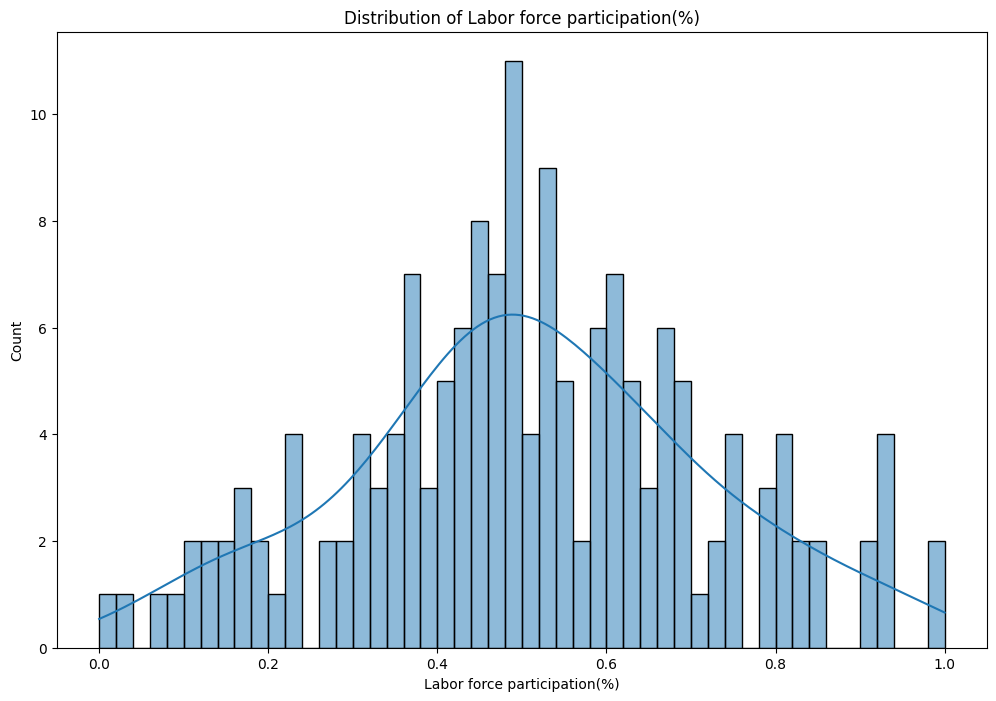

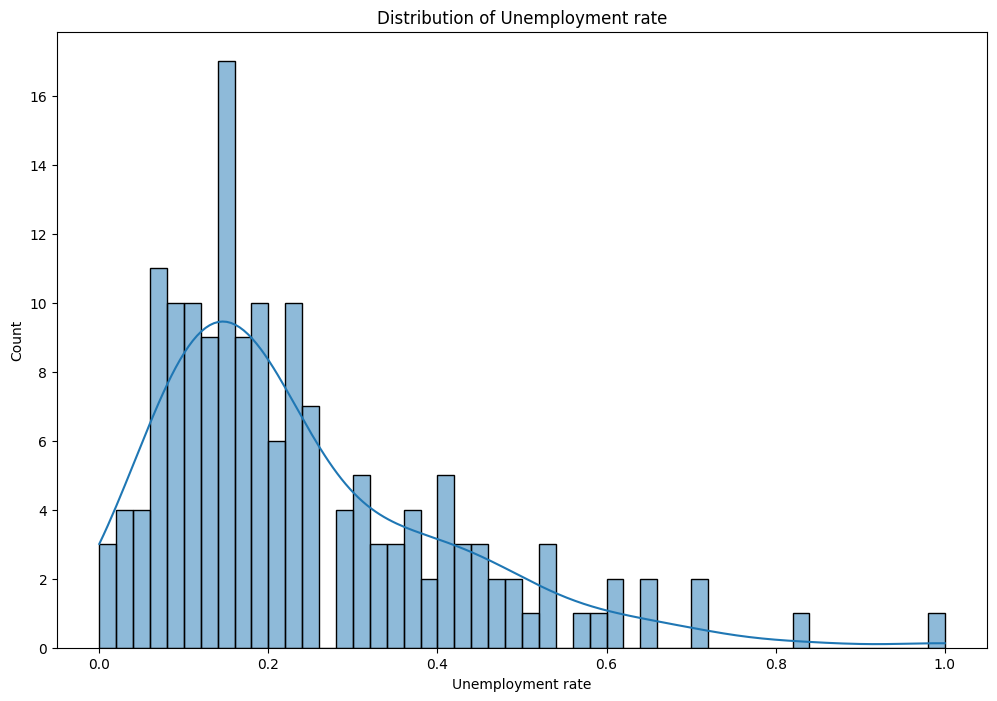

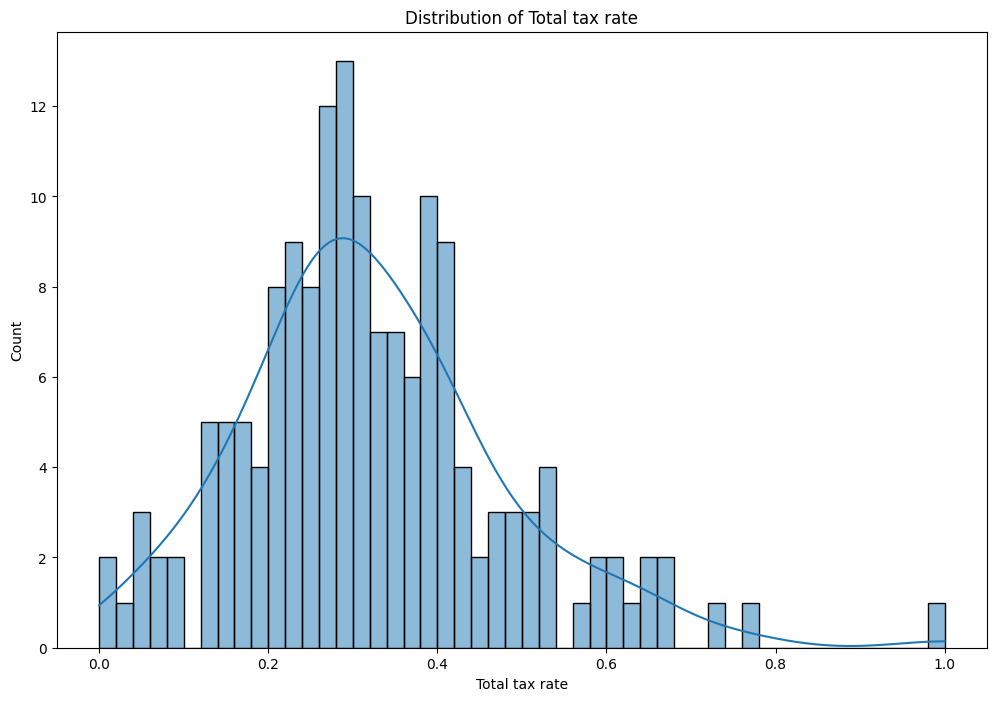

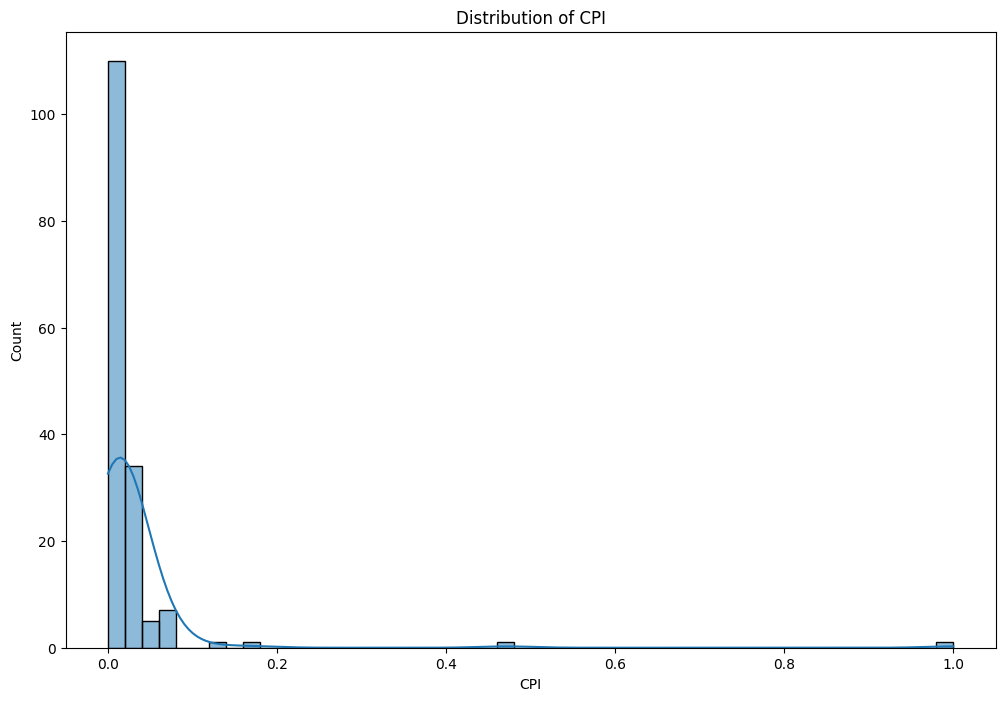

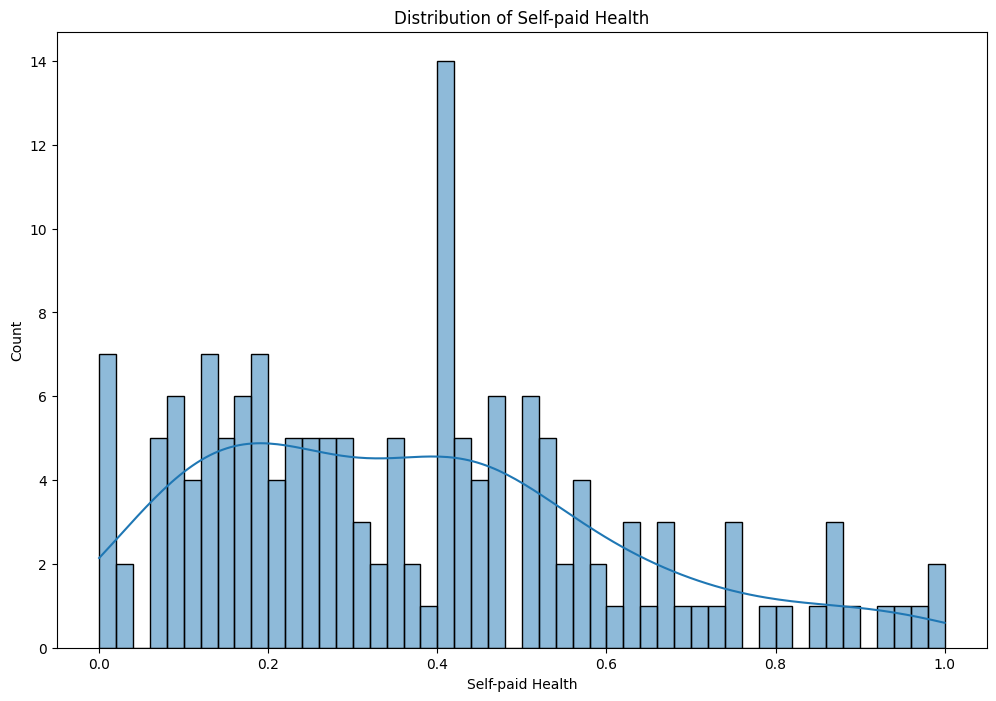

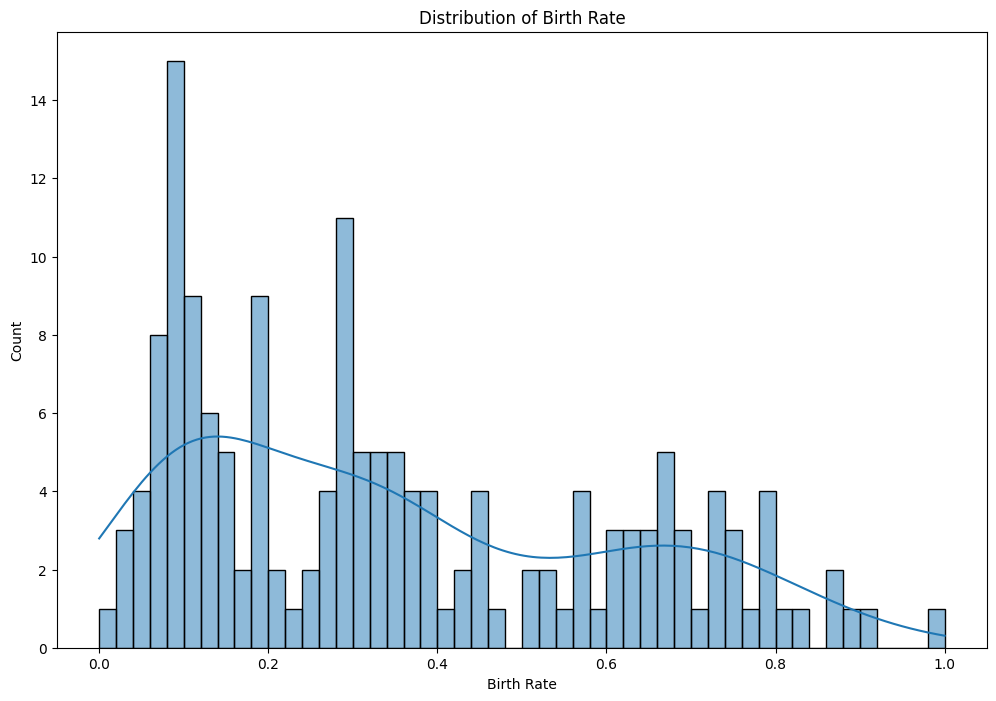

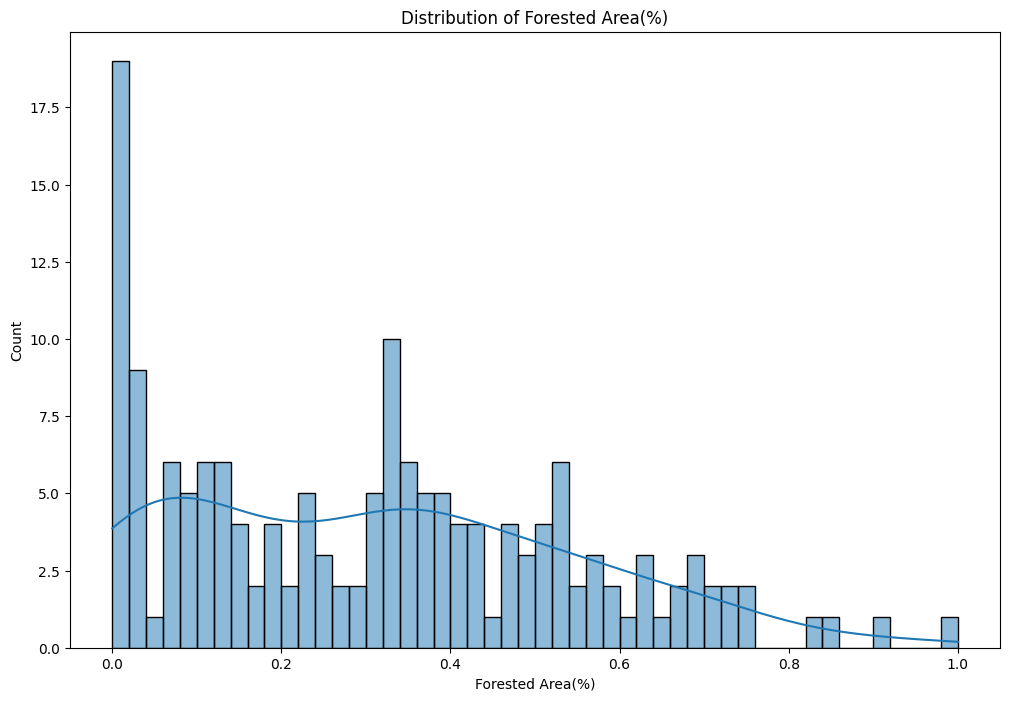

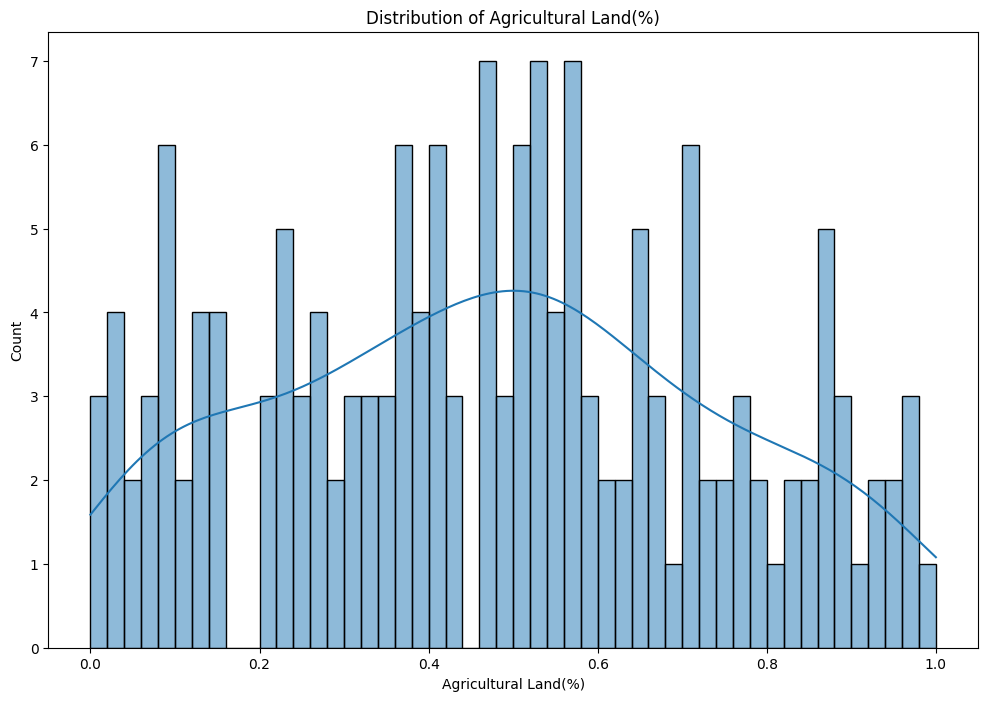

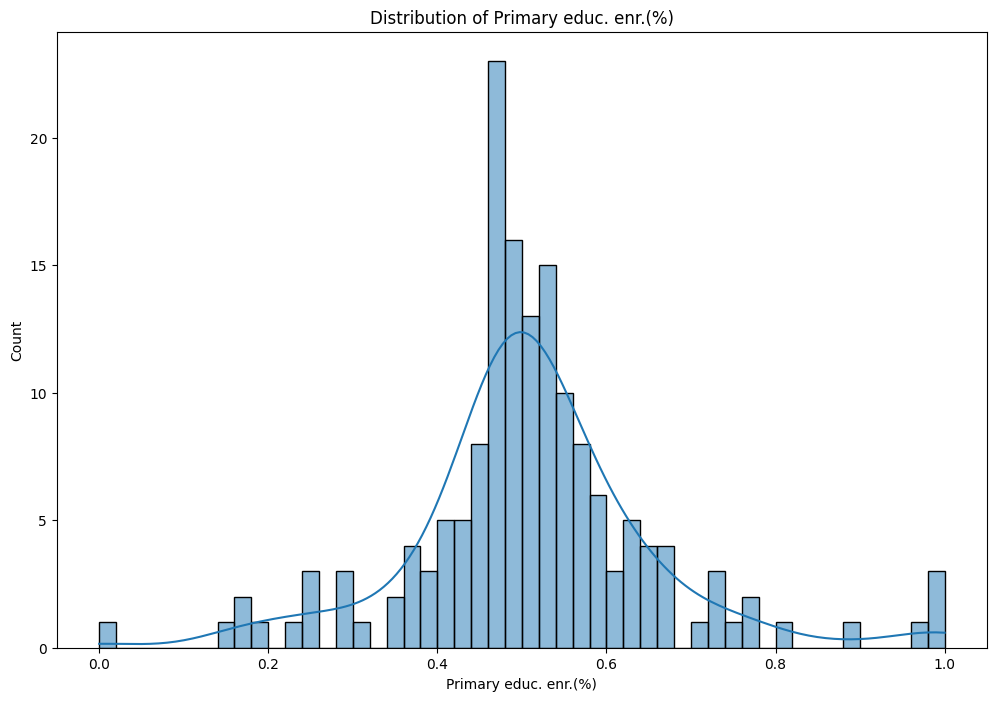

In [54]:
for i in dataset_scaled.drop('Country',axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(dataset_scaled[i],kde=True,bins=50)
    plt.title(f'Distribution of {i}')
    plt.show()